In [550]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas_profiling import ProfileReport
import datetime
from sklearn.linear_model import LinearRegression
import scipy as sp
from scipy import optimize as opt
import statistics as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


import tensorflow as tf
from tensorflow import keras


ticker = 0

In [551]:
#importing documents from finder
#THIS IS DIFFERENT ACETONE CONCENTRATIONS

file_path = 'DATA/JonahData/Different_Acetone'



zero_name = '0ppm'
seven_name = '7ppm'
fourteen_name = '14ppm'
twenty_one_name = '21ppm'
twenty_nine_name = '29ppm'
thirty_six_name = '36ppm'
fourty_three_name = '43ppm'
fifty_name = '50ppm'





#reading in the data as a txt file

zeroppmA = pd.read_csv(file_path + '/' + zero_name, sep = '\t', header = None)
zeroppmA.columns = ['Time', 'Resistance', 'Binary']
zeroppmA['ppm'] = 0
zeroppmA['RH'] = 0

sevenppmA = pd.read_csv(file_path + '/' + seven_name, sep = '\t', header = None)
sevenppmA.columns = ['Time', 'Resistance', 'Binary']
sevenppmA['ppm'] = 7
sevenppmA['RH'] = 0


fourteenppmA = pd.read_csv(file_path + '/' + fourteen_name, sep = '\t', header = None)
fourteenppmA.columns = ['Time', 'Resistance', 'Binary']
fourteenppmA['ppm'] = 14
fourteenppmA['RH'] = 0

twentyoneppmA = pd.read_csv(file_path + '/' + twenty_one_name, sep = '\t', header = None)
twentyoneppmA.columns = ['Time', 'Resistance', 'Binary']
twentyoneppmA['ppm'] = 21
twentyoneppmA['RH'] = 0


twentynineppmA = pd.read_csv(file_path + '/' + twenty_nine_name, sep = '\t', header = None)
twentynineppmA.columns = ['Time', 'Resistance', 'Binary']
twentynineppmA['ppm'] = 29
twentynineppmA['RH'] = 0

thirtysixppmA = pd.read_csv(file_path + '/' + thirty_six_name, sep = '\t', header = None)
thirtysixppmA.columns = ['Time', 'Resistance', 'Binary']
thirtysixppmA['ppm'] = 36
thirtysixppmA['RH'] = 0

fourtythreeppmA = pd.read_csv(file_path + '/' + fourty_three_name, sep = '\t', header = None)
fourtythreeppmA.columns = ['Time', 'Resistance', 'Binary']
fourtythreeppmA['ppm'] = 43
fourtythreeppmA['RH'] = 0

fiftyppmA = pd.read_csv(file_path + '/' + fifty_name, sep = '\t', header = None)
fiftyppmA.columns = ['Time', 'Resistance', 'Binary']
fiftyppmA['ppm'] = 50
fiftyppmA['RH'] = 0





#creating a list of the dataframes
dataframes_A_one = [zeroppmA, sevenppmA, fourteenppmA, twentyoneppmA, twentynineppmA, thirtysixppmA, fourtythreeppmA, fiftyppmA]

#adding headers to all dataframes
#3 columns with time, resistance, and binary

ppm_values_1 = [0, 7, 14, 21, 29, 36, 43, 50]

#adding a 4th column with the ppm value
for i in range(len(dataframes_A_one)):
    dataframes_A_one[i]['ppm'] = ppm_values_1[i]






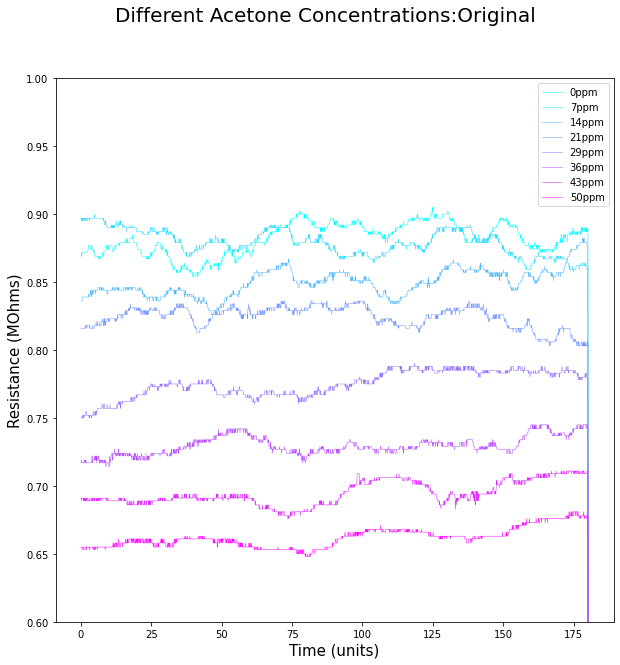

In [552]:
#lets try to plot all of the data on one graph
Aplot = plt.figure(figsize = (10,10))
Aplot.suptitle('Different Acetone Concentrations:Original', fontsize = 20)
for i in range(len(dataframes_A_one)):
    plt.plot(dataframes_A_one[i]['Time'], dataframes_A_one[i]['Resistance'], label = str(i))

# #create vertical lines on the graph every 30 seconds
# for i in range(0, 210, 30):
#     plt.axvline(i, color = 'black', linestyle = '--')


#plot one binary value on the graph






plt.ylim(.6, 1)
    
plt.xlabel('Time (units)', fontsize = 15)
plt.ylabel('Resistance (MOhms)', fontsize = 15)
plt.legend(['0ppm', '7ppm', '14ppm', '21ppm', '29ppm', '36ppm', '43ppm', '50ppm'])
plt.show()





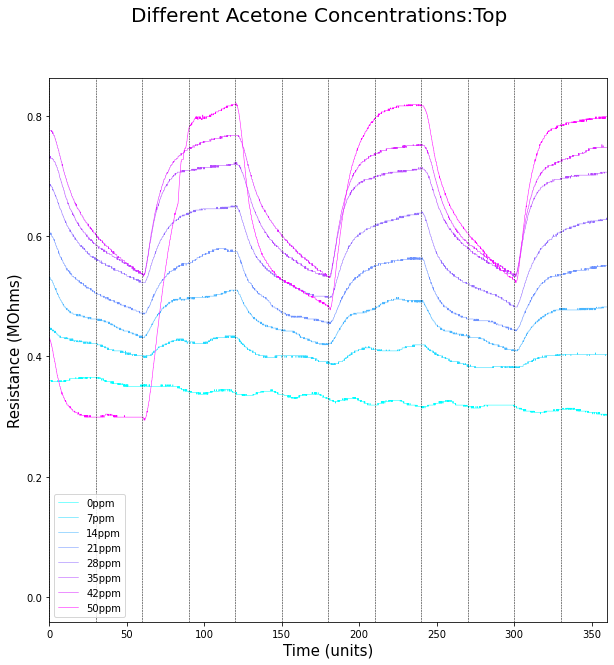

In [553]:
#Top acetone concentrations
#file path is same

top_zero_name = 'Top_aceton0 ppm'
top_seven_name = 'Top_aceton7 ppm'
top_fourteen_name = 'Top_aceton14 ppm'
top_twenty_one_name = 'Top_aceton21 ppm'
top_twenty_eight_name = 'Top_aceton28 ppm'
top_thirty_five_name = 'Top_aceton35 ppm'
top_fourty_two_name = 'Top_aceton42 ppm'
top_fifty_name = 'Top_aceton50 ppm'





top_zeroppmA = pd.read_csv(file_path + '/' + top_zero_name, sep = '\t', header = None)
top_sevenppmA = pd.read_csv(file_path + '/' + top_seven_name, sep = '\t', header = None)
top_fourteenppmA = pd.read_csv(file_path + '/' + top_fourteen_name, sep = '\t', header = None)
top_twentyoneppmA = pd.read_csv(file_path + '/' + top_twenty_one_name, sep = '\t', header = None)
top_twentyeightppmA = pd.read_csv(file_path + '/' + top_twenty_eight_name, sep = '\t', header = None)
top_thirtyfiveppmA = pd.read_csv(file_path + '/' + top_thirty_five_name, sep = '\t', header = None)
top_fourtytwoppmA = pd.read_csv(file_path + '/' + top_fourty_two_name, sep = '\t', header = None)
top_fiftyppmA = pd.read_csv(file_path + '/' + top_fifty_name, sep = '\t', header = None)

#added 3 column labels to each dataframe
top_zeroppmA.columns = ['Time', 'Resistance', 'Binary']
top_sevenppmA.columns = ['Time', 'Resistance', 'Binary']
top_fourteenppmA.columns = ['Time', 'Resistance', 'Binary']
top_twentyoneppmA.columns = ['Time', 'Resistance', 'Binary']
top_twentyeightppmA.columns = ['Time', 'Resistance', 'Binary']
top_thirtyfiveppmA.columns = ['Time', 'Resistance', 'Binary']
top_fourtytwoppmA.columns = ['Time', 'Resistance', 'Binary']
top_fiftyppmA.columns = ['Time', 'Resistance', 'Binary']


#Adding zero RH to all datasets
top_zeroppmA['RH'] = 0
top_sevenppmA['RH'] = 0
top_fourteenppmA['RH'] = 0
top_twentyoneppmA['RH'] = 0
top_twentyeightppmA['RH'] = 0
top_thirtyfiveppmA['RH'] = 0
top_fourtytwoppmA['RH'] = 0
top_fiftyppmA['RH'] = 0

#adding ppm values
top_zeroppmA['ppm'] = 0
top_sevenppmA['ppm'] = 7
top_fourteenppmA['ppm'] = 14
top_twentyoneppmA['ppm'] = 21
top_twentyeightppmA['ppm'] = 28
top_thirtyfiveppmA['ppm'] = 35
top_fourtytwoppmA['ppm'] = 42
top_fiftyppmA['ppm'] = 50







#creating a list of the dataframes
dataframes_A_two = [top_zeroppmA, top_sevenppmA, top_fourteenppmA, top_twentyoneppmA, top_twentyeightppmA, top_thirtyfiveppmA, top_fourtytwoppmA, top_fiftyppmA]

ppm_values_2 = [0, 7, 14, 21, 28, 35, 42, 50]




















#lets try to plot all of the data on one graph
Bplot = plt.figure(figsize = (10,10))
Bplot.suptitle('Different Acetone Concentrations:Top', fontsize = 20)
for i in range(len(dataframes_A_two)):
    plt.plot(dataframes_A_two[i]['Time'], dataframes_A_two[i]['Resistance'], label = str(i))

#create vertical lines on the graph every 30 seconds
for i in range(0, 390, 30):
    plt.axvline(i, color = 'black', linestyle = '--')


#change the x range to [0,360]
plt.xlim(0, 360)



plt.xlabel('Time (units)', fontsize = 15)
plt.ylabel('Resistance (MOhms)', fontsize = 15)
plt.legend(['0ppm', '7ppm', '14ppm', '21ppm', '28ppm', '35ppm', '42ppm', '50ppm'])
plt.show()



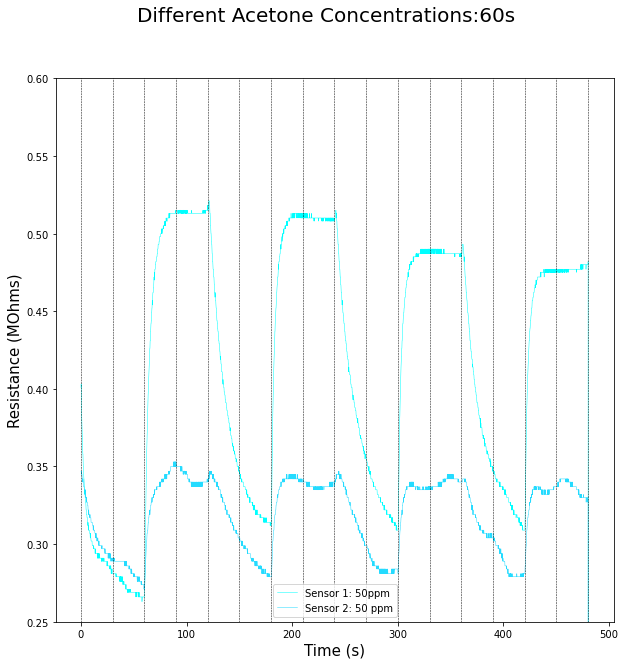

In [554]:
#Code for two remaining different acetone levels

sixtyS_nameone= '50ppm-acetone-60s-sensor1'
sixtyS_nametwo= '50ppm-acetone-60s-sensor2'

sixtyS_sensor1 = pd.read_csv(file_path + '/' + sixtyS_nameone, sep = '\t', header = None)
sixtyS_sensor2 = pd.read_csv(file_path + '/' + sixtyS_nametwo, sep = '\t', header = None)


#adding headers to all dataframes
#3 columns with time, resistance, and binary

sixtyS_sensor1.columns = ['Time', 'Resistance', 'Binary']
sixtyS_sensor2.columns = ['Time', 'Resistance', 'Binary']


#lets try to plot all of the data on one graph
Cplot = plt.figure(figsize = (10,10))
Cplot.suptitle('Different Acetone Concentrations:60s', fontsize = 20)
plt.plot(sixtyS_sensor1['Time'], sixtyS_sensor1['Resistance'], label = 'Sensor 1')
plt.plot(sixtyS_sensor2['Time'], sixtyS_sensor2['Resistance'], label = 'Sensor 2')

#create vertical lines on the graph every 30 seconds
for i in range(0, 510, 30):
    plt.axvline(i, color = 'black', linestyle = '--')


#add 50 ppm to both datasets in the 4th column
sixtyS_sensor1['ppm'] = 50
sixtyS_sensor2['ppm'] = 50

#make RH value 0
sixtyS_sensor1['RH'] = 0
sixtyS_sensor2['RH'] = 0


plt.ylim(.25,.6)

#label the x and y axises

plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Resistance (MOhms)', fontsize = 15)
plt.legend(['Sensor 1: 50ppm', 'Sensor 2: 50 ppm'])

plt.show()










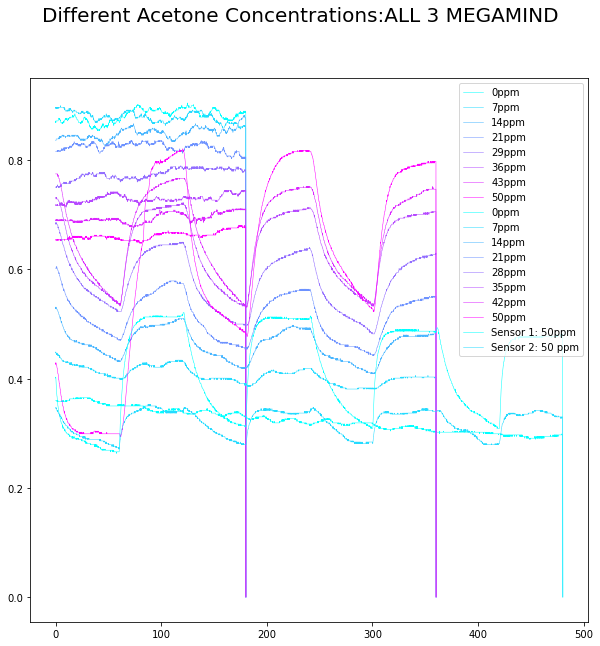

In [555]:
Combined_Plot_Acetone = plt.figure(figsize = (10,10))
Combined_Plot_Acetone.suptitle('Different Acetone Concentrations:ALL 3 MEGAMIND', fontsize = 20)





for i in range(len(dataframes_A_one)):
    plt.plot(dataframes_A_one[i]['Time'], dataframes_A_one[i]['Resistance'], label = str(i))

for i in range(len(dataframes_A_two)):
    plt.plot(dataframes_A_two[i]['Time'], dataframes_A_two[i]['Resistance'], label = str(i))


plt.plot(sixtyS_sensor1['Time'], sixtyS_sensor1['Resistance'], label = 'Sensor 1')
plt.plot(sixtyS_sensor2['Time'], sixtyS_sensor2['Resistance'], label = 'Sensor 2')

#this all needs to be labled with acetone ppm
plt.legend(['0ppm', '7ppm', '14ppm', '21ppm', '29ppm', '36ppm', '43ppm', '50ppm', '0ppm', '7ppm', '14ppm', '21ppm', '28ppm', '35ppm', '42ppm', '50ppm', 'Sensor 1: 50ppm', 'Sensor 2: 50 ppm'])







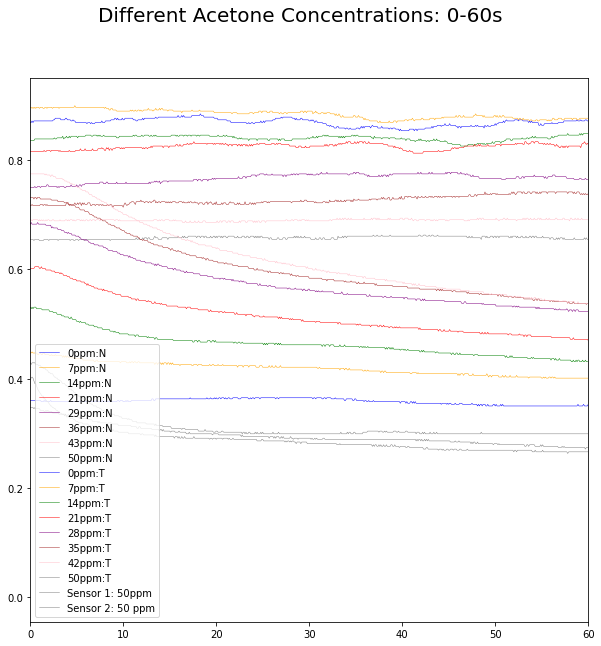

In [556]:
#I'd like to create another instance of the above graph, but only from 0 to 60

Combined_Plot_Acetone_60 = plt.figure(figsize = (10,10))

Combined_Plot_Acetone_60.suptitle('Different Acetone Concentrations: 0-60s', fontsize = 20)

colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray"]

for i in range(len(dataframes_A_one)):
    plt.plot(dataframes_A_one[i]['Time'], dataframes_A_one[i]['Resistance'], label = str(i),color = colors[i])
    

for i in range(len(dataframes_A_two)):
    plt.plot(dataframes_A_two[i]['Time'], dataframes_A_two[i]['Resistance'], label = str(i), color = colors[i])


plt.plot(sixtyS_sensor1['Time'], sixtyS_sensor1['Resistance'], label = 'Sensor 1',color = "gray")
plt.plot(sixtyS_sensor2['Time'], sixtyS_sensor2['Resistance'], label = 'Sensor 2', color = "gray")

#this all needs to be labled with acetone ppm
plt.legend(['0ppm:N', '7ppm:N', '14ppm:N', '21ppm:N', '29ppm:N', '36ppm:N', '43ppm:N', '50ppm:N', '0ppm:T', '7ppm:T', '14ppm:T', '21ppm:T', '28ppm:T', '35ppm:T', '42ppm:T', '50ppm:T', 'Sensor 1: 50ppm', 'Sensor 2: 50 ppm'])









plt.xlim(0,60)

plt.show()


In [557]:
#importing different RH conditions

file_path_2 = 'DATA/JonahData/Different_RH'

file_name_1 = 'NDSU4-50ppm acetone-RH1-60s'
file_name_2 = 'NDSU4-50ppm acetone-RH2-60s'
file_name_3 = 'NDSU4-50ppm acetone-RH3-60s'
file_name_4 = 'NDSU4-50ppm acetone-RH4-60s'
file_name_5 = 'no RH-50ppm acetone'
file_name_6 = 'RH 2-50ppm acetone_60s'
file_name_7 = 'RH 3-50ppm acetone_60s'
file_name_8 = 'RH 3.65-no acetone-30'
file_name_9 = 'RH 4-50ppm acetone_60s'
file_name_10 = 'RH 11.33-no acetone-30'
file_name_11 = 'RH 20.43-no acetone-30'
file_name_12 = 'RH 32.83-no acetone-30'
file_name_13 = 'RH 36.30-no acetone-30'

#creating dataframes for each file
RH1 = pd.read_csv(file_path_2 + '/' + file_name_1, sep = '\t', header = None)
RH1.columns = ['Time', 'Resistance', 'Binary']
RH1['ppm'] = 50
RH1['RH'] = 1

RH2 = pd.read_csv(file_path_2 + '/' + file_name_2, sep = '\t', header = None)
RH2.columns = ['Time', 'Resistance', 'Binary']
RH2['ppm'] = 50
RH2['RH'] = 2

RH3 = pd.read_csv(file_path_2 + '/' + file_name_3, sep = '\t', header = None)
RH3.columns = ['Time', 'Resistance', 'Binary']
RH3['ppm'] = 50
RH3['RH'] = 3

RH4 = pd.read_csv(file_path_2 + '/' + file_name_4, sep = '\t', header = None)
RH4.columns = ['Time', 'Resistance', 'Binary']
RH4['ppm'] = 50
RH4['RH'] = 4

RH5 = pd.read_csv(file_path_2 + '/' + file_name_5, sep = '\t', header = None)
RH5.columns = ['Time', 'Resistance', 'Binary']
RH5['ppm'] = 50
RH5['RH'] = 0

RH6 = pd.read_csv(file_path_2 + '/' + file_name_6, sep = '\t', header = None)
RH6.columns = ['Time', 'Resistance', 'Binary']
RH6['ppm'] = 50
RH6['RH'] = 2

RH7 = pd.read_csv(file_path_2 + '/' + file_name_7, sep = '\t', header = None)
RH7.columns = ['Time', 'Resistance', 'Binary']
RH7['ppm'] = 50
RH7['RH'] = 3

RH8 = pd.read_csv(file_path_2 + '/' + file_name_8, sep = '\t', header = None)
RH8.columns = ['Time', 'Resistance', 'Binary']
RH8['ppm'] = 0
RH8['RH'] = 3.65

RH9 = pd.read_csv(file_path_2 + '/' + file_name_9, sep = '\t', header = None)
RH9.columns = ['Time', 'Resistance', 'Binary']
RH9['ppm'] = 50
RH9['RH'] = 4

RH10 = pd.read_csv(file_path_2 + '/' + file_name_10, sep = '\t', header = None)
RH10.columns = ['Time', 'Resistance', 'Binary']
RH10['ppm'] = 0
RH10['RH'] = 11.33

RH11 = pd.read_csv(file_path_2 + '/' + file_name_11, sep = '\t', header = None)
RH11.columns = ['Time', 'Resistance', 'Binary']
RH11['ppm'] = 0
RH11['RH'] = 20.43

RH12 = pd.read_csv(file_path_2 + '/' + file_name_12, sep = '\t', header = None)
RH12.columns = ['Time', 'Resistance', 'Binary']
RH12['ppm'] = 0
RH12['RH'] = 32.83

RH13 = pd.read_csv(file_path_2 + '/' + file_name_13, sep = '\t', header = None)
RH13.columns = ['Time', 'Resistance', 'Binary']
RH13['ppm'] = 0
RH13['RH'] = 36.3

#combining all dataframes into one list
dataframes_B = [RH1, RH2, RH3, RH4, RH5, RH6, RH7, RH8, RH9, RH10, RH11, RH12, RH13]




#ONE OF THESE FILES WILL HAVE TO BE ELIMINATED, IT ONLY POSSESSES 600 data points, much less than any other file given
#This is RH5
#eliminating RH5
dataframes_B.pop(4)


#print the length of all RH dataframes
for i in range(len(dataframes_B)):
    print(len(dataframes_B[i]))





4803
4803
4803
3603
3603
3603
1803
3603
1803
1803
1803
1803


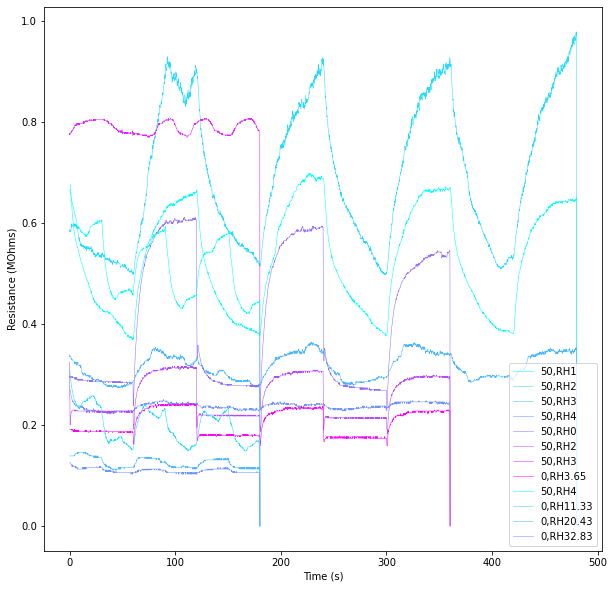

In [558]:
#plot em all
plt.figure(figsize = (10,10))
for i in dataframes_B:
    plt.plot(i['Time'], i['Resistance'])

#please make the legned with both ppm and RH included
plt.legend(['50,RH1','50,RH2','50,RH3','50,RH4','50,RH0','50,RH2','50,RH3','0,RH3.65','50,RH4','0,RH11.33','0,RH20.43','0,RH32.83','0,RH36.3'])
plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')


plt.show()

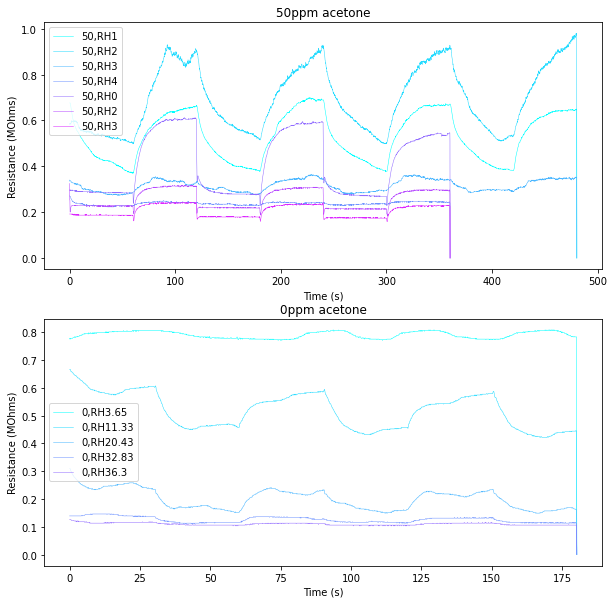

In [559]:
#please now split this into two subplots, one for all 50s and one for all 0s
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
for i in dataframes_B:
    if i['ppm'][0] == 50:
        plt.plot(i['Time'], i['Resistance'])
    
plt.legend(['50,RH1','50,RH2','50,RH3','50,RH4','50,RH0','50,RH2','50,RH3','50,RH4'])
plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('50ppm acetone')

plt.subplot(2,1,2)
for i in dataframes_B:
    if i['ppm'][0] == 0:
        plt.plot(i['Time'], i['Resistance'])

plt.legend(['0,RH3.65','0,RH11.33','0,RH20.43','0,RH32.83','0,RH36.3'])
plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')

plt.title('0ppm acetone')

plt.show()


In [560]:
#importing the different Temp Files

file_path_3 = 'DATA/JonahData/Different_Temp'

da_name_1 = '140C_50ppm_30sec'
da_name_2 = '150C_50ppm_30sec'
da_name_3 = '160C_50ppm_30sec'
da_name_4 = '160C-0ppm acetone'
da_name_5 = '160C-17ppm acetone'
da_name_6 = '160C-50ppm acetone'
da_name_7 = '160C-no acetone'
da_name_8 = '180C_50ppm_30sec'
da_name_9 = '180C-0ppm acetone'
da_name_10 = '180C-17ppm acetone'
da_name_11 = '180C-50ppm acetone'
da_name_12 = '210C_50ppm_30sec'
da_name_13 = '210C-0ppm acetone'
da_name_14 = '210C-17ppm acetone'
da_name_15 = '210C-50ppm acetone'
da_name_16 = '225C_50ppm_30sec'
da_name_17 = '225C-0ppm acetone'
da_name_18 = '225C-17ppm acetone'
da_name_19 = '225C-50ppm acetone'

#reading in the different temp files
Temp1 = pd.read_csv(file_path_3 + '/' + da_name_1, sep = '\t', header = None)
Temp1.columns = ['Time', 'Resistance', 'Binary']
Temp1['ppm'] = 50
Temp1['Temp'] = 140
Temp1['RH']= 0

Temp2 = pd.read_csv(file_path_3 + '/' + da_name_2, sep = '\t', header = None)
Temp2.columns = ['Time', 'Resistance', 'Binary']
Temp2['ppm'] = 50
Temp2['Temp'] = 150
Temp2['RH']= 0

Temp3 = pd.read_csv(file_path_3 + '/' + da_name_3, sep = '\t', header = None)
Temp3.columns = ['Time', 'Resistance', 'Binary']
Temp3['ppm'] = 50
Temp3['Temp'] = 160
Temp3['RH']= 0

Temp4 = pd.read_csv(file_path_3 + '/' + da_name_4, sep = '\t', header = None)
Temp4.columns = ['Time', 'Resistance', 'Binary']
Temp4['ppm'] = 0
Temp4['Temp'] = 160
Temp4['RH']= 0


Temp5 = pd.read_csv(file_path_3 + '/' + da_name_5, sep = '\t', header = None)
Temp5.columns = ['Time', 'Resistance', 'Binary']
Temp5['ppm'] = 17
Temp5['Temp'] = 160
Temp5['RH']= 0

Temp6 = pd.read_csv(file_path_3 + '/' + da_name_6, sep = '\t', header = None)
Temp6.columns = ['Time', 'Resistance', 'Binary']
Temp6['ppm'] = 50
Temp6['Temp'] = 160
Temp6['RH']= 0

Temp7 = pd.read_csv(file_path_3 + '/' + da_name_7, sep = '\t', header = None)
Temp7.columns = ['Time', 'Resistance', 'Binary']
Temp7['ppm'] = 0
Temp7['Temp'] = 160
Temp7['RH']= 0

Temp8 = pd.read_csv(file_path_3 + '/' + da_name_8, sep = '\t', header = None)
Temp8.columns = ['Time', 'Resistance', 'Binary']
Temp8['ppm'] = 50
Temp8['Temp'] = 180
Temp8['RH']= 0

Temp9 = pd.read_csv(file_path_3 + '/' + da_name_9, sep = '\t', header = None)
Temp9.columns = ['Time', 'Resistance', 'Binary']
Temp9['ppm'] = 0
Temp9['Temp'] = 180
Temp9['RH']= 0

Temp10 = pd.read_csv(file_path_3 + '/' + da_name_10, sep = '\t', header = None)
Temp10.columns = ['Time', 'Resistance', 'Binary']
Temp10['ppm'] = 17
Temp10['Temp'] = 180
Temp10['RH']= 0

Temp11 = pd.read_csv(file_path_3 + '/' + da_name_11, sep = '\t', header = None)
Temp11.columns = ['Time', 'Resistance', 'Binary']
Temp11['ppm'] = 50
Temp11['Temp'] = 180
Temp11['RH']= 0

Temp12 = pd.read_csv(file_path_3 + '/' + da_name_12, sep = '\t', header = None)
Temp12.columns = ['Time', 'Resistance', 'Binary']
Temp12['ppm'] = 50
Temp12['Temp'] = 210
Temp12['RH']= 0

Temp13 = pd.read_csv(file_path_3 + '/' + da_name_13, sep = '\t', header = None)
Temp13.columns = ['Time', 'Resistance', 'Binary']
Temp13['ppm'] = 0
Temp13['Temp'] = 210
Temp13['RH']= 0

Temp14 = pd.read_csv(file_path_3 + '/' + da_name_14, sep = '\t', header = None)
Temp14.columns = ['Time', 'Resistance', 'Binary']
Temp14['ppm'] = 17
Temp14['Temp'] = 210
Temp14['RH']= 0

Temp15 = pd.read_csv(file_path_3 + '/' + da_name_15, sep = '\t', header = None)
Temp15.columns = ['Time', 'Resistance', 'Binary']
Temp15['ppm'] = 50
Temp15['Temp'] = 210
Temp15['RH']= 0

Temp16 = pd.read_csv(file_path_3 + '/' + da_name_16, sep = '\t', header = None)
Temp16.columns = ['Time', 'Resistance', 'Binary']
Temp16['ppm'] = 50
Temp16['Temp'] = 225
Temp16['RH']= 0

Temp17 = pd.read_csv(file_path_3 + '/' + da_name_17, sep = '\t', header = None)
Temp17.columns = ['Time', 'Resistance', 'Binary']
Temp17['ppm'] = 0
Temp17['Temp'] = 225
Temp17['RH']= 0

Temp18 = pd.read_csv(file_path_3 + '/' + da_name_18, sep = '\t', header = None)
Temp18.columns = ['Time', 'Resistance', 'Binary']
Temp18['ppm'] = 17
Temp18['Temp'] = 225
Temp18['RH']= 0

Temp19 = pd.read_csv(file_path_3 + '/' + da_name_19, sep = '\t', header = None)
Temp19.columns = ['Time', 'Resistance', 'Binary']
Temp19['ppm'] = 50
Temp19['Temp'] = 225
Temp19['RH']= 0

#combining all the dataframes into one list
Temp_list = [Temp1, Temp2, Temp3, Temp4, Temp5, Temp6, Temp7, Temp8, Temp9, Temp10, Temp11, Temp12, Temp13, Temp14, Temp15, Temp16, Temp17, Temp18, Temp19]


In [561]:
#Now it's time for the mega dataframe including all of them



#creating the mega dataframe with Temp, RH, and ppm
#the columns will be time, resistance, binary, ppm, Temp, RH

#creating the empty dataframe
mega_df = pd.DataFrame()
mega_df.drop(mega_df.index, inplace = True)

#creating the loop to add all the dataframes into the mega dataframe
for i in range(len(Temp_list)):
    mega_df = mega_df.append(Temp_list[i], ignore_index = True)


#Adding the RH list, but putting in the average Temp Value as a placeholder

Tempverage = mega_df['Temp'].mean()
RH1['Temp'] = Tempverage
RH2['Temp'] = Tempverage
RH3['Temp'] = Tempverage
RH4['Temp'] = Tempverage
RH5['Temp'] = Tempverage
RH6['Temp'] = Tempverage
RH7['Temp'] = Tempverage
RH8['Temp'] = Tempverage
RH9['Temp'] = Tempverage
RH10['Temp'] = Tempverage
RH11['Temp'] = Tempverage
RH12['Temp'] = Tempverage
RH13['Temp'] = Tempverage


RH_list = [RH1, RH2, RH3, RH4, RH6, RH7, RH8, RH9, RH10, RH11, RH12, RH13]

zeroppmA['Temp'] = Tempverage
sevenppmA['Temp'] = Tempverage
fourteenppmA['Temp'] = Tempverage
twentyoneppmA['Temp'] = Tempverage
twentynineppmA['Temp'] = Tempverage
thirtysixppmA['Temp'] = Tempverage
fourtythreeppmA['Temp'] = Tempverage
fiftyppmA['Temp'] = Tempverage

var_ppm_list = [zeroppmA, sevenppmA, fourteenppmA, twentyoneppmA, twentynineppmA, thirtysixppmA, fourtythreeppmA, fiftyppmA]

top_zeroppmA['Temp'] = Tempverage
top_sevenppmA['Temp'] = Tempverage
top_fourteenppmA['Temp'] = Tempverage
top_twentyoneppmA['Temp'] = Tempverage
top_twentyeightppmA['Temp'] = Tempverage
top_thirtyfiveppmA['Temp'] = Tempverage
top_fourtytwoppmA['Temp'] = Tempverage
top_fiftyppmA['Temp'] = Tempverage

top_ppm_list = [top_zeroppmA, top_sevenppmA, top_fourteenppmA, top_twentyoneppmA, top_twentyeightppmA, top_thirtyfiveppmA, top_fourtytwoppmA, top_fiftyppmA]

sixtyS_sensor1['Temp'] = Tempverage
sixtyS_sensor2['Temp'] = Tempverage

sixtyS_list = [sixtyS_sensor1, sixtyS_sensor2]




#add all 13 RH dataframes to the megadf now that they have the same column names
mega_df = mega_df.append(RH1, ignore_index = True)
mega_df = mega_df.append(RH2, ignore_index = True)
mega_df = mega_df.append(RH3, ignore_index = True)
mega_df = mega_df.append(RH4, ignore_index = True)
# mega_df = mega_df.append(RH5, ignore_index = True)
mega_df = mega_df.append(RH6, ignore_index = True)
mega_df = mega_df.append(RH7, ignore_index = True)
mega_df = mega_df.append(RH8, ignore_index = True)
mega_df = mega_df.append(RH9, ignore_index = True)
mega_df = mega_df.append(RH10, ignore_index = True)
mega_df = mega_df.append(RH11, ignore_index = True)
mega_df = mega_df.append(RH12, ignore_index = True)
mega_df = mega_df.append(RH13, ignore_index = True)

#Add all ppm dataframes to the megadf now that they have the same column names
mega_df = mega_df.append(zeroppmA, ignore_index = True)
mega_df = mega_df.append(sevenppmA, ignore_index = True)
mega_df = mega_df.append(fourteenppmA, ignore_index = True)
mega_df = mega_df.append(twentyoneppmA, ignore_index = True)
mega_df = mega_df.append(twentynineppmA, ignore_index = True)
mega_df = mega_df.append(thirtysixppmA, ignore_index = True)
mega_df = mega_df.append(fourtythreeppmA, ignore_index = True)
mega_df = mega_df.append(fiftyppmA, ignore_index = True)

#Add the misc acetone lists
mega_df = mega_df.append(sixtyS_sensor1, ignore_index = True)
mega_df = mega_df.append(sixtyS_sensor2, ignore_index = True)

#Add the top acetone lists
mega_df = mega_df.append(top_zeroppmA, ignore_index = True)
mega_df = mega_df.append(top_sevenppmA, ignore_index = True)
mega_df = mega_df.append(top_fourteenppmA, ignore_index = True)
mega_df = mega_df.append(top_twentyoneppmA, ignore_index = True)
mega_df = mega_df.append(top_twentyeightppmA, ignore_index = True)
mega_df = mega_df.append(top_thirtyfiveppmA, ignore_index = True)
mega_df = mega_df.append(top_fourtytwoppmA, ignore_index = True)
mega_df = mega_df.append(top_fiftyppmA, ignore_index = True)


#Adding in the acetone lists


#total length of all dataframes
total_length = 0
for i in range(len(Temp_list)):
    total_length = total_length + len(Temp_list[i])

for i in range(len(dataframes_B)):
    total_length = total_length + len(dataframes_B[i])

for i in range(len(dataframes_A_one)):
    total_length = total_length + len(dataframes_A_one[i])

for i in range(len(dataframes_A_two)):
    total_length = total_length + len(dataframes_A_two[i])

total_length = total_length + len(sixtyS_sensor1)
total_length = total_length + len(sixtyS_sensor2)



print(total_length)
print(len(mega_df))



199947
199947


In [562]:
#print the value counts of the time column

TIMEList = mega_df['Time'].value_counts()

#put TIMELIST in numeric order
TIMEList = TIMEList.sort_index()
print(TIMEList)



0.0      49
0.1      49
0.2      49
0.3      49
0.4      49
0.5      49
0.6      49
0.7      49
0.8      49
0.9      49
1.0      49
1.1      49
1.2      49
1.3      49
1.4      49
1.5      49
1.6      49
1.7      49
1.8      49
1.9      49
2.0      49
2.1      49
2.2      49
2.3      49
2.4      49
2.5      49
2.6      49
2.7      49
2.8      49
2.9      49
3.0      49
3.1      49
3.2      49
3.3      49
3.4      49
3.5      49
3.6      49
3.7      49
3.8      49
3.9      49
4.0      49
4.1      49
4.2      49
4.3      49
4.4      49
4.5      49
4.6      49
4.7      49
4.8      49
4.9      49
5.0      49
5.1      49
5.2      49
5.3      49
5.4      49
5.5      49
5.6      49
5.7      49
5.8      49
5.9      49
6.0      49
6.1      49
6.2      49
6.3      49
6.4      49
6.5      49
6.6      49
6.7      49
6.8      49
6.9      49
7.0      49
7.1      49
7.2      49
7.3      49
7.4      49
7.5      49
7.6      49
7.7      49
7.8      49
7.9      49
8.0      49
8.1      49
8.2      49
8.3 

In [563]:
mega_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [564]:
#lists
Temp_list
RH_list
var_ppm_list
top_ppm_list
sixtyS_list

print(len(var_ppm_list))

print(len(RH_list))



#lengths have now been standardized

8
12


In [565]:
#now I need to make a list of the dataframes that are the same length as the shortest dataframe
#I want to take the first 1803 points from every dataframe

for i in range(len(Temp_list)):
    Temp_list[i] = Temp_list[i].head(1803)

for i in range(len(RH_list)):
    RH_list[i] = RH_list[i].head(1803)

for i in range(len(var_ppm_list)):
    var_ppm_list[i] = var_ppm_list[i].head(1803)

for i in range(len(top_ppm_list)):
    top_ppm_list[i] = top_ppm_list[i].head(1803)

for i in range(len(sixtyS_list)):
    sixtyS_list[i] = sixtyS_list[i].head(1803)

length_list= []

#I woild like to print a list of the lengths of all the datasets in these lists
for i in range(len(Temp_list)):
    length_list.append(len(Temp_list[i]))
    

for i in range(len(RH_list)):
    length_list.append(len(RH_list[i]))

for i in range(len(var_ppm_list)):
    length_list.append(len(var_ppm_list[i]))

for i in range(len(top_ppm_list)):
    length_list.append(len(top_ppm_list[i]))

for i in range(len(sixtyS_list)):
    length_list.append(len(sixtyS_list[i]))

#order length_list
length_list = sorted(length_list)

print(length_list)



[1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803, 1803]


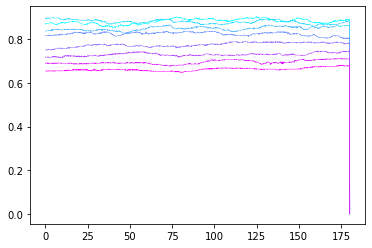

In [566]:
#REGRESSION TIME
#well start with var_ppm
#I want my X to be both 'Time' and 'Resistance'

#I want my Y to be 'ppm'
#use var_ppm_list


#Add all X's to one variable
X = []
for i in range(8):
    X.append(var_ppm_list[i][['Time', 'Resistance']])


X = pd.concat(X, ignore_index = True)

#Add all Y's to one variable
Y = []
for i in range(8):
    Y.append(var_ppm_list[i]['ppm'])

Y = pd.concat(Y, ignore_index = True)



#plot them all on one plot (Time vs Resistance)
for i in range(8):
    plt.plot(var_ppm_list[i]['Time'], var_ppm_list[i]['Resistance'], label = 'ppm = ' + str(i))
    



plt.show()



In [567]:
# print(var_ppm_list[0])

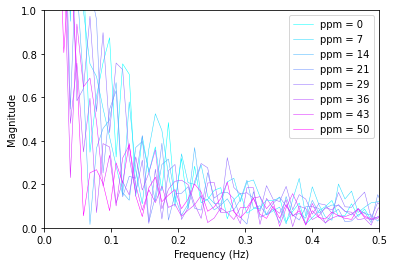

   ppm       DC
0    0  898.915
1    7  903.425
2   14  866.697
3   21  847.484
4   29  786.533
5   36  744.944
6   43  705.671
7   50  673.108


In [568]:
#START OF THE FOURIER TRANSFORM SECTION


new_var_ppm_fourier = var_ppm_list

#make the length 1024 for the fourier transform

for i in range(len(new_var_ppm_fourier)):
    new_var_ppm_fourier[i] = new_var_ppm_fourier[i].head(1024)


#I want to fourier transform the resistance column of each dataframe

time_step = .1
sampling_freq = 1/time_step
n = 1024

delta_f = sampling_freq/n

freque_axis = np.arange(0, sampling_freq/2, delta_f)

new_fft_result = []

#do this for all the dataframes in the list

for i in range(len(new_var_ppm_fourier)):
    new_fft_result.append(np.fft.fft(new_var_ppm_fourier[i]['Resistance']))

#get the magnitude spectrum of the fft result

new_fft_result = np.abs(new_fft_result)

#plot the magnitude spectrum of the first fft result

# plt.plot(freque_axis, new_fft_result[0][0:512])
# plt.xlim(0, 5)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')

# plt.ylim(0,2)

# highest_freqs = []

# for i in range(len(new_fft_result)):
#     highest_freqs.append(np.max(new_fft_result[i][0:512]))

# print(highest_freqs)

#I want the locations of the highest frequencies

#plot them all on one plot

ppm_values_6 = [0,7,14,21,29,36,43,50]

for i in range(len(new_fft_result)):
    plt.plot(freque_axis, new_fft_result[i][0:512], label = 'ppm = ' + str(ppm_values_6[i]))
    plt.xlim(0, .5)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.ylim(0,1)
    plt.legend()
    #make the lines smaller 
    plt.rcParams['lines.linewidth'] = 0.5
    plt.rcParams['lines.markersize'] = 0.5
    #make higher ppm values a darker color and lower ppm values a lighter color
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.cool(np.linspace(0, 1, 8)))





    



plt.show()



#I want to list the top 100 frequencies for each ppm value

#take the [0] value for each ppm value

DC_Initial_Freqs = []

for i in range(len(new_fft_result)):
    DC_Initial_Freqs.append(new_fft_result[i][0])

#add the ppm values to the list

for i in range(len(DC_Initial_Freqs)):
    DC_Initial_Freqs[i] = [DC_Initial_Freqs[i], ppm_values_6[i]]

#make a nice table for me please

DC_Initial_Freqs = pd.DataFrame(DC_Initial_Freqs, columns = ['DC', 'ppm'])

#put ppm first

DC_Initial_Freqs = DC_Initial_Freqs[['ppm', 'DC']]


print(DC_Initial_Freqs)















In [569]:
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt




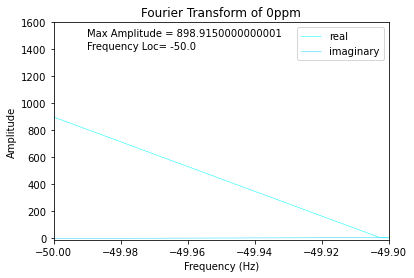

In [570]:
#lets start with var_ppm_list
#I want to perform a fourier transform

#lets create new fourier transform variables as to not mess up the list for future processing
var_ppm_list_fourier = var_ppm_list

#start with zero ppm
time_step = .1
sampling_freq = 1/time_step

zero_fft_result = np.fft.fft(var_ppm_list_fourier[0]['Resistance'])
zero_freq_axis = np.fft.fftfreq(len(zero_fft_result), d = time_step)
zero_freq_axis_hz = np.fft.fftshift(zero_freq_axis) * sampling_freq


#plot the complex as well
plt.plot(zero_freq_axis_hz, zero_fft_result.real, label = 'real')
plt.plot(zero_freq_axis_hz, zero_fft_result.imag, label = 'imaginary')
plt.legend()

#label the axis
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 0ppm')




#find the max amplitude
zero_max_amplitude = np.max(np.abs(zero_fft_result))
zero_max_freq = zero_freq_axis_hz[np.argmax(zero_fft_result)]


#add a label for the max amplitude and frequency

plt.xlim(-50,-49.9)
plt.ylim(-10,1600)

plt.annotate('Max Amplitude = ' + str(zero_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(zero_max_freq), xy = (-49.99, 1400))

#I want to calculate the intercept between the real and imaginary parts
#There appears to be multiple intercepts

# I need it to check in negatives aswell
#I want to find the intercepts between the real and imaginary parts

plt.show()



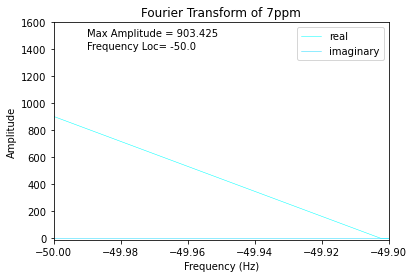

In [571]:
#now lets do it for 7 ppm
#sampling frequency is the same
seven_fft_result = np.fft.fft(var_ppm_list_fourier[1]['Resistance'])
seven_freq_axis = np.fft.fftfreq(len(seven_fft_result), d = time_step)
seven_freq_axis_hz = np.fft.fftshift(seven_freq_axis) * sampling_freq
plt.plot(seven_freq_axis_hz, seven_fft_result.real, label = 'real')
plt.plot(seven_freq_axis_hz, seven_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 7ppm')
seven_max_amplitude = np.max(np.abs(seven_fft_result))
seven_max_freq = seven_freq_axis_hz[np.argmax(seven_fft_result)]

plt.xlim(-50,-49.9)
plt.ylim(-10,1600)

plt.annotate('Max Amplitude = ' + str(seven_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(seven_max_freq), xy = (-49.99, 1400))




plt.show()

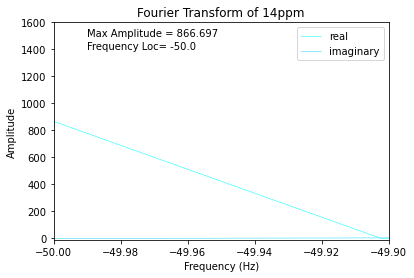

In [572]:
#now 14ppm in [2]
fourteen_fft_result = np.fft.fft(var_ppm_list_fourier[2]['Resistance'])
fourteen_freq_axis = np.fft.fftfreq(len(fourteen_fft_result), d = time_step)
fourteen_freq_axis_hz = np.fft.fftshift(fourteen_freq_axis) * sampling_freq
plt.plot(fourteen_freq_axis_hz, fourteen_fft_result.real, label = 'real')
plt.plot(fourteen_freq_axis_hz, fourteen_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 14ppm')
fourteen_max_amplitude = np.max(np.abs(fourteen_fft_result))
fourteen_max_freq = fourteen_freq_axis_hz[np.argmax(fourteen_fft_result)]

plt.xlim(-50,-49.9)
plt.ylim(-10,1600)

plt.annotate('Max Amplitude = ' + str(fourteen_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fourteen_max_freq), xy = (-49.99, 1400))

plt.show()

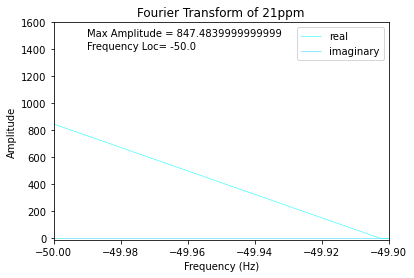

In [573]:
#now 21 ppm in [3]

twentyone_fft_result = np.fft.fft(var_ppm_list_fourier[3]['Resistance'])
twentyone_freq_axis = np.fft.fftfreq(len(twentyone_fft_result), d = time_step)
twentyone_freq_axis_hz = np.fft.fftshift(twentyone_freq_axis) * sampling_freq
plt.plot(twentyone_freq_axis_hz, twentyone_fft_result.real, label = 'real')
plt.plot(twentyone_freq_axis_hz, twentyone_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 21ppm')
twentyone_max_amplitude = np.max(np.abs(twentyone_fft_result))
twentyone_max_freq = twentyone_freq_axis_hz[np.argmax(twentyone_fft_result)]
plt.xlim(-50,-49.9)
plt.ylim(-10,1600)
plt.annotate('Max Amplitude = ' + str(twentyone_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(twentyone_max_freq), xy = (-49.99, 1400))
plt.show()


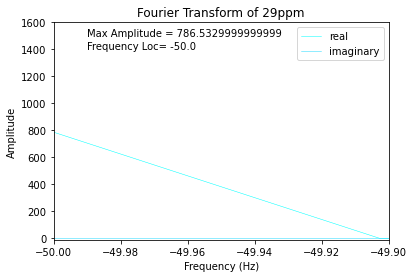

In [574]:
#now 29 ppm in [4]

twentynine_fft_result = np.fft.fft(var_ppm_list_fourier[4]['Resistance'])
twentynine_freq_axis = np.fft.fftfreq(len(twentynine_fft_result), d = time_step)
twentynine_freq_axis_hz = np.fft.fftshift(twentynine_freq_axis) * sampling_freq
plt.plot(twentynine_freq_axis_hz, twentynine_fft_result.real, label = 'real')
plt.plot(twentynine_freq_axis_hz, twentynine_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 29ppm')
twentynine_max_amplitude = np.max(np.abs(twentynine_fft_result))
twentynine_max_freq = twentynine_freq_axis_hz[np.argmax(twentynine_fft_result)]
plt.xlim(-50,-49.9)
plt.ylim(-10,1600)
plt.annotate('Max Amplitude = ' + str(twentynine_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(twentynine_max_freq), xy = (-49.99, 1400))
plt.show()


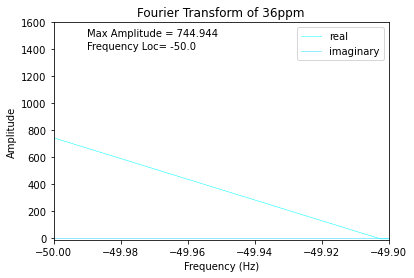

In [575]:
#now 36 ppm in [5]

thirtysix_fft_result = np.fft.fft(var_ppm_list_fourier[5]['Resistance'])
thirtysix_freq_axis = np.fft.fftfreq(len(thirtysix_fft_result), d = time_step)
thirtysix_freq_axis_hz = np.fft.fftshift(thirtysix_freq_axis) * sampling_freq
plt.plot(thirtysix_freq_axis_hz, thirtysix_fft_result.real, label = 'real')
plt.plot(thirtysix_freq_axis_hz, thirtysix_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 36ppm')
thirtysix_max_amplitude = np.max(np.abs(thirtysix_fft_result))
thirtysix_max_freq = thirtysix_freq_axis_hz[np.argmax(thirtysix_fft_result)]
plt.xlim(-50,-49.9)
plt.ylim(-10,1600)
plt.annotate('Max Amplitude = ' + str(thirtysix_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(thirtysix_max_freq), xy = (-49.99, 1400))
plt.show()

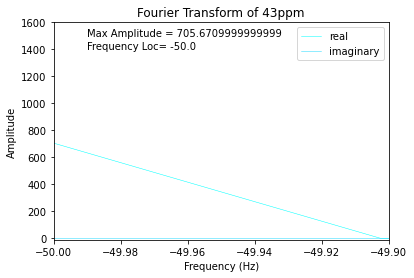

In [576]:
#now 43 ppm in [6]

fourtythree_fft_result = np.fft.fft(var_ppm_list_fourier[6]['Resistance'])
fourtythree_freq_axis = np.fft.fftfreq(len(fourtythree_fft_result), d = time_step)
fourtythree_freq_axis_hz = np.fft.fftshift(fourtythree_freq_axis) * sampling_freq
plt.plot(fourtythree_freq_axis_hz, fourtythree_fft_result.real, label = 'real')
plt.plot(fourtythree_freq_axis_hz, fourtythree_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 43ppm')
fourtythree_max_amplitude = np.max(np.abs(fourtythree_fft_result))
fourtythree_max_freq = fourtythree_freq_axis_hz[np.argmax(fourtythree_fft_result)]
plt.xlim(-50,-49.9)
plt.ylim(-10,1600)
plt.annotate('Max Amplitude = ' + str(fourtythree_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fourtythree_max_freq), xy = (-49.99, 1400))
plt.show()



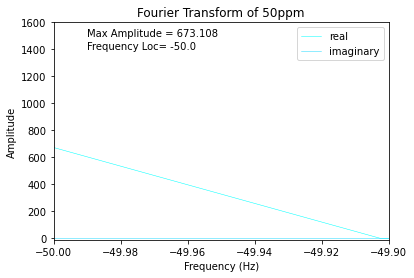

In [577]:
#finally 50ppm in [7]

fifty_fft_result = np.fft.fft(var_ppm_list_fourier[7]['Resistance'])
fifty_freq_axis = np.fft.fftfreq(len(fifty_fft_result), d = time_step)
fifty_freq_axis_hz = np.fft.fftshift(fifty_freq_axis) * sampling_freq
plt.plot(fifty_freq_axis_hz, fifty_fft_result.real, label = 'real')
plt.plot(fifty_freq_axis_hz, fifty_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 50ppm')
fifty_max_amplitude = np.max(np.abs(fifty_fft_result))
fifty_max_freq = fifty_freq_axis_hz[np.argmax(fifty_fft_result)]
plt.xlim(-50,-49.9)
plt.ylim(-10,1600)
plt.annotate('Max Amplitude = ' + str(fifty_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fifty_max_freq), xy = (-49.99, 1400))
plt.show()

In [578]:
#I want to print out the max amplitudes and frequencies for each ppm
#Id like to make a table to do this
#I will use the tabulate package to do this

from tabulate import tabulate

#I want three columns, ppm, max amplitude, and frequency location
#I will make a list of lists to do this

ppm_list = [0, 7, 14, 21, 29, 36, 43, 50]
max_amplitude_list = [zero_max_amplitude, seven_max_amplitude, fourteen_max_amplitude, twentyone_max_amplitude, twentynine_max_amplitude, thirtysix_max_amplitude, fourtythree_max_amplitude, fifty_max_amplitude]
max_freq_list = [zero_max_freq, seven_max_freq, fourteen_max_freq, twentyone_max_freq, twentynine_max_freq, thirtysix_max_freq, fourtythree_max_freq, fifty_max_freq]

#now I will make a list of lists

# TOTAL_lists = [ppm_list, max_amplitude_list, max_freq_list]
TOTAL_lists = [ppm_list, max_amplitude_list]


#make a transpose of this list

TOTAL_lists = np.transpose(TOTAL_lists)

#now I will print out the table
daTable = tabulate(TOTAL_lists, headers = ['ppm', 'Max Amplitude'])

print(daTable)




  ppm    Max Amplitude
-----  ---------------
    0          898.915
    7          903.425
   14          866.697
   21          847.484
   29          786.533
   36          744.944
   43          705.671
   50          673.108


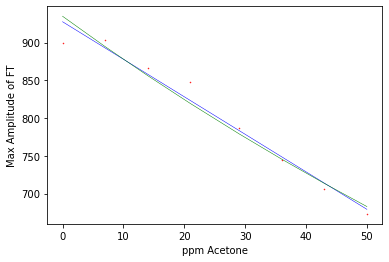

In [579]:
#graph this table with individual points

plt.plot(ppm_list, max_amplitude_list, 'ro')
plt.xlabel('ppm Acetone')
plt.ylabel('Max Amplitude of FT')



#create a best fit linear line

Linear_best = np.polyfit(ppm_list, max_amplitude_list, 1)
Linear_best_fit = np.poly1d(Linear_best)
plt.plot(ppm_list, Linear_best_fit(ppm_list), 'b-', label = 'Linear Best Fit')

#now exponential best fit
exp_best = np.polyfit(ppm_list, np.log(max_amplitude_list), 1)
exp_best_fit = np.poly1d(exp_best)
plt.plot(ppm_list, np.exp(exp_best_fit(ppm_list)), 'g-', label = 'Exponential Best Fit')

#normal fitting lines
#For a more precise fit, I used https://mycurvefit.com/







plt.show()




R^2 value for best fit = -54.212202715964764


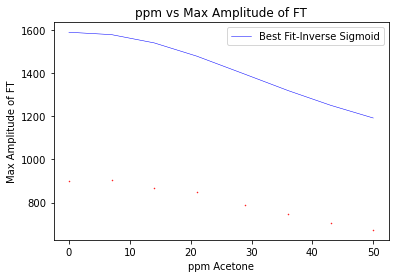

In [580]:
plt.plot(ppm_list, max_amplitude_list, 'ro')
plt.xlabel('ppm Acetone')
plt.ylabel('Max Amplitude of FT')
plt.title('ppm vs Max Amplitude of FT')

def best_fit(x):
    x = np.array(x)
    y = 888.4146 + (1589.999 - 888.4146) / (1 + (x / 44.32382) ** 2.239912)
    return y




plt.plot(ppm_list, best_fit(ppm_list), 'b-', label = 'Best Fit-Inverse Sigmoid')
plt.legend()

#Get an R^2 value for this fit ppm is x and max amplitude is y
from sklearn.metrics import r2_score

r2 = r2_score(max_amplitude_list, best_fit(ppm_list))
print('R^2 value for best fit = ' + str(r2))



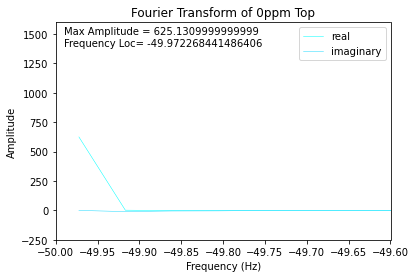

In [581]:
#Now Im gonna do FT of the 0ppm top data
#sampling freq is the same


fourier_top_ppm = top_ppm_list

#start with 0ppm
zero_top_fft_result = np.fft.fft(fourier_top_ppm[0]['Resistance'])
zero_top_freq_axis = np.fft.fftfreq(len(zero_top_fft_result), d = time_step)
zero_top_freq_axis_hz = np.fft.fftshift(zero_top_freq_axis) * sampling_freq
plt.plot(zero_top_freq_axis_hz, zero_top_fft_result.real, label = 'real')
plt.plot(zero_top_freq_axis_hz, zero_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 0ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
zero_top_max_amplitude = np.max(np.abs(zero_top_fft_result))
zero_top_max_freq = zero_top_freq_axis_hz[np.argmax(zero_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(zero_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(zero_top_max_freq), xy = (-49.99, 1400))
plt.show()




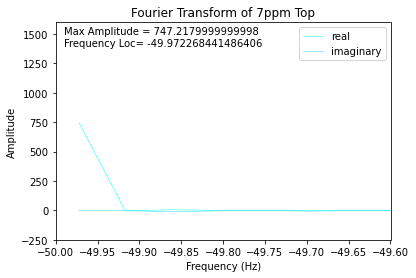

In [582]:
#7 ppm top in [1]
seven_top_fft_result = np.fft.fft(fourier_top_ppm[1]['Resistance'])
seven_top_freq_axis = np.fft.fftfreq(len(seven_top_fft_result), d = time_step)
seven_top_freq_axis_hz = np.fft.fftshift(seven_top_freq_axis) * sampling_freq
plt.plot(seven_top_freq_axis_hz, seven_top_fft_result.real, label = 'real')
plt.plot(seven_top_freq_axis_hz, seven_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 7ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
seven_top_max_amplitude = np.max(np.abs(seven_top_fft_result))
seven_top_max_freq = seven_top_freq_axis_hz[np.argmax(seven_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(seven_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(seven_top_max_freq), xy = (-49.99, 1400))
plt.show()



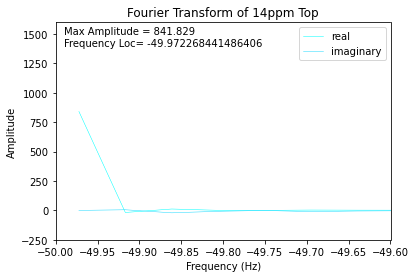

In [583]:
#14 ppm top in [2]
fourteen_top_fft_result = np.fft.fft(fourier_top_ppm[2]['Resistance'])
fourteen_top_freq_axis = np.fft.fftfreq(len(fourteen_top_fft_result), d = time_step)
fourteen_top_freq_axis_hz = np.fft.fftshift(fourteen_top_freq_axis) * sampling_freq
plt.plot(fourteen_top_freq_axis_hz, fourteen_top_fft_result.real, label = 'real')
plt.plot(fourteen_top_freq_axis_hz, fourteen_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 14ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
fourteen_top_max_amplitude = np.max(np.abs(fourteen_top_fft_result))
fourteen_top_max_freq = fourteen_top_freq_axis_hz[np.argmax(fourteen_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(fourteen_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fourteen_top_max_freq), xy = (-49.99, 1400))
plt.show()

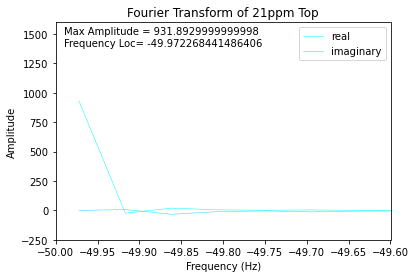

In [584]:
#21 ppm top in [3]
twentyone_top_fft_result = np.fft.fft(fourier_top_ppm[3]['Resistance'])
twentyone_top_freq_axis = np.fft.fftfreq(len(twentyone_top_fft_result), d = time_step)
twentyone_top_freq_axis_hz = np.fft.fftshift(twentyone_top_freq_axis) * sampling_freq
plt.plot(twentyone_top_freq_axis_hz, twentyone_top_fft_result.real, label = 'real')
plt.plot(twentyone_top_freq_axis_hz, twentyone_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 21ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
twentyone_top_max_amplitude = np.max(np.abs(twentyone_top_fft_result))
twentyone_top_max_freq = twentyone_top_freq_axis_hz[np.argmax(twentyone_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(twentyone_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(twentyone_top_max_freq), xy = (-49.99, 1400))
plt.show()

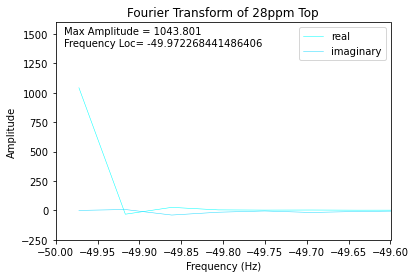

In [585]:
#28 ppm top in [4]
twentyeight_top_fft_result = np.fft.fft(fourier_top_ppm[4]['Resistance'])
twentyeight_top_freq_axis = np.fft.fftfreq(len(twentyeight_top_fft_result), d = time_step)
twentyeight_top_freq_axis_hz = np.fft.fftshift(twentyeight_top_freq_axis) * sampling_freq
plt.plot(twentyeight_top_freq_axis_hz, twentyeight_top_fft_result.real, label = 'real')
plt.plot(twentyeight_top_freq_axis_hz, twentyeight_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 28ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
twentyeight_top_max_amplitude = np.max(np.abs(twentyeight_top_fft_result))
twentyeight_top_max_freq = twentyeight_top_freq_axis_hz[np.argmax(twentyeight_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(twentyeight_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(twentyeight_top_max_freq), xy = (-49.99, 1400))
plt.show()

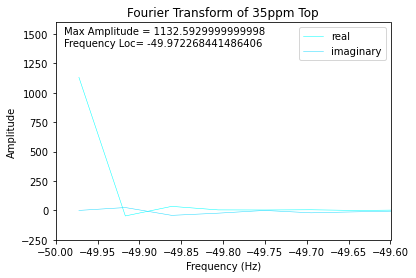

In [586]:
#35 ppm top in [5]
thirtyfive_top_fft_result = np.fft.fft(fourier_top_ppm[5]['Resistance'])
thirtyfive_top_freq_axis = np.fft.fftfreq(len(thirtyfive_top_fft_result), d = time_step)
thirtyfive_top_freq_axis_hz = np.fft.fftshift(thirtyfive_top_freq_axis) * sampling_freq
plt.plot(thirtyfive_top_freq_axis_hz, thirtyfive_top_fft_result.real, label = 'real')
plt.plot(thirtyfive_top_freq_axis_hz, thirtyfive_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 35ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
thirtyfive_top_max_amplitude = np.max(np.abs(thirtyfive_top_fft_result))
thirtyfive_top_max_freq = thirtyfive_top_freq_axis_hz[np.argmax(thirtyfive_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(thirtyfive_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(thirtyfive_top_max_freq), xy = (-49.99, 1400))
plt.show()

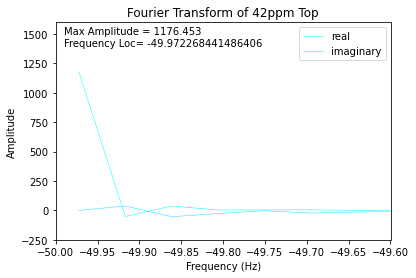

In [587]:
#now 42 ppm top in [6]

fourtytwo_top_fft_result = np.fft.fft(fourier_top_ppm[6]['Resistance'])
fourtytwo_top_freq_axis = np.fft.fftfreq(len(fourtytwo_top_fft_result), d = time_step)
fourtytwo_top_freq_axis_hz = np.fft.fftshift(fourtytwo_top_freq_axis) * sampling_freq
plt.plot(fourtytwo_top_freq_axis_hz, fourtytwo_top_fft_result.real, label = 'real')
plt.plot(fourtytwo_top_freq_axis_hz, fourtytwo_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 42ppm Top')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
fourtytwo_top_max_amplitude = np.max(np.abs(fourtytwo_top_fft_result))
fourtytwo_top_max_freq = fourtytwo_top_freq_axis_hz[np.argmax(fourtytwo_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(fourtytwo_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fourtytwo_top_max_freq), xy = (-49.99, 1400))
plt.show()

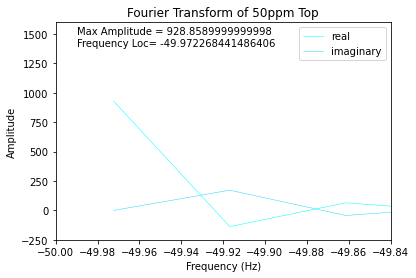

In [588]:
#50 ppm top in [7]
fifty_top_fft_result = np.fft.fft(fourier_top_ppm[7]['Resistance'])
fifty_top_freq_axis = np.fft.fftfreq(len(fifty_top_fft_result), d = time_step)
fifty_top_freq_axis_hz = np.fft.fftshift(fifty_top_freq_axis) * sampling_freq
plt.plot(fifty_top_freq_axis_hz, fifty_top_fft_result.real, label = 'real')
plt.plot(fifty_top_freq_axis_hz, fifty_top_fft_result.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 50ppm Top')
plt.xlim(-50,-49.84)
plt.ylim(-250,1600)
fifty_top_max_amplitude = np.max(np.abs(fifty_top_fft_result))
fifty_top_max_freq = fifty_top_freq_axis_hz[np.argmax(fifty_top_fft_result)]
plt.annotate('Max Amplitude = ' + str(fifty_top_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fifty_top_max_freq), xy = (-49.99, 1400))



plt.show()


#At about -49.86 Hertz, a spike emerges as ppm increases


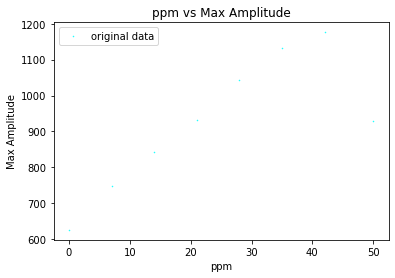

   ppm  max_amplitude
0    0        625.131
1    7        747.218
2   14        841.829
3   21        931.893
4   28       1043.801
5   35       1132.593
6   42       1176.453
7   50        928.859


In [589]:
#Table of ppm vs max amplitude



ppm = [0, 7, 14, 21, 28, 35, 42, 50]
max_amplitude = [zero_top_max_amplitude, seven_top_max_amplitude, fourteen_top_max_amplitude, twentyone_top_max_amplitude, twentyeight_top_max_amplitude, thirtyfive_top_max_amplitude, fourtytwo_top_max_amplitude, fifty_top_max_amplitude]



#linear best fit line



#put the best fit line on the graph
plt.plot(ppm, max_amplitude, 'o', label = 'original data')
plt.xlabel('ppm')
plt.ylabel('Max Amplitude')
plt.title('ppm vs Max Amplitude')
plt.legend()

plt.show()

#make a table with the ppm and max amplitude data

ppm_max_amplitude_table = pd.DataFrame({'ppm': ppm, 'max_amplitude': max_amplitude},)

print(ppm_max_amplitude_table)




#The question becomes, is the 50 ppm data an outlier? We have other ppm data to check
#In addition, is this fourier data valuable and consistent?


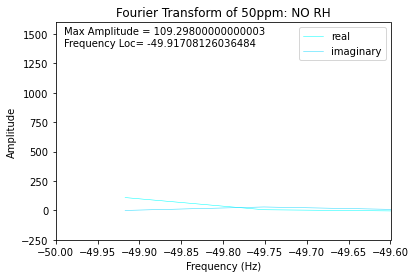

In [590]:
#RH5 is a test of 50 ppm with no Humidity

fourier_test = RH5

fourier_test_five = np.fft.fft(fourier_test['Resistance'])
fourier_test_freq_axis = np.fft.fftfreq(len(fourier_test_five), d = time_step)
fourier_test_freq_axis_hz = np.fft.fftshift(fourier_test_freq_axis) * sampling_freq

plt.plot(fourier_test_freq_axis_hz, fourier_test_five.real, label = 'real')
plt.plot(fourier_test_freq_axis_hz, fourier_test_five.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of 50ppm: NO RH')
plt.xlim(-50,-49.6)
plt.ylim(-250,1600)
fourier_test_max_amplitude = np.max(np.abs(fourier_test_five))
fourier_test_max_freq = fourier_test_freq_axis_hz[np.argmax(fourier_test_five)]
plt.annotate('Max Amplitude = ' + str(fourier_test_max_amplitude), xy = (-49.99, 1500))
plt.annotate('Frequency Loc= ' + str(fourier_test_max_freq), xy = (-49.99, 1400))
plt.show()





(0.2, 0.9)

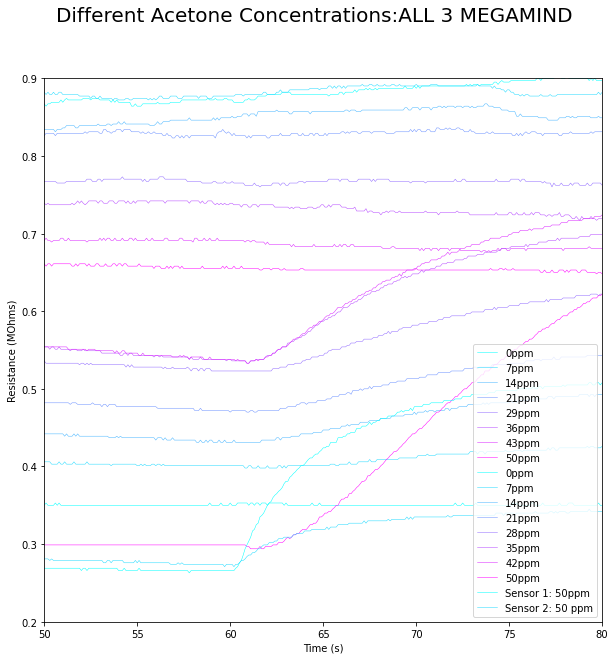

In [591]:
Combined_Plot_Acetone = plt.figure(figsize = (10,10))
Combined_Plot_Acetone.suptitle('Different Acetone Concentrations:ALL 3 MEGAMIND', fontsize = 20)





for i in range(len(dataframes_A_one)):
    plt.plot(dataframes_A_one[i]['Time'], dataframes_A_one[i]['Resistance'], label = str(i))

for i in range(len(dataframes_A_two)):
    plt.plot(dataframes_A_two[i]['Time'], dataframes_A_two[i]['Resistance'], label = str(i))


plt.plot(sixtyS_sensor1['Time'], sixtyS_sensor1['Resistance'], label = 'Sensor 1')
plt.plot(sixtyS_sensor2['Time'], sixtyS_sensor2['Resistance'], label = 'Sensor 2')

#this all needs to be labled with acetone ppm
plt.legend(['0ppm', '7ppm', '14ppm', '21ppm', '29ppm', '36ppm', '43ppm', '50ppm', '0ppm', '7ppm', '14ppm', '21ppm', '28ppm', '35ppm', '42ppm', '50ppm', 'Sensor 1: 50ppm', 'Sensor 2: 50 ppm'])
plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.xlim(50,80)
plt.ylim(.2,.9)






In [592]:
#CLEAR PATTERNS EXIST WITH Acetone, whether you consider the top or normal view
#We see extremely good correlation with fourier transform maxiums in the non-top view (I'm calling it normal)
#There is also a decreasing pattern with starting resistance when exposed to higher and higher acetone levels
#On the tops, clear discrpancies also arise, and not in the frequency domain, but in normal space
#There is a clear spike which increases as acetone exposure increases. This occurs around 60 time units
#More slope is exposed as acetone levels grow, but the same effect in not seen in frequency amplitudes. In fact a reverse effect can be observec
#With limited data (prob not statistically signficaint)

Text(0, 0.5, 'Resistance (MOhms)')

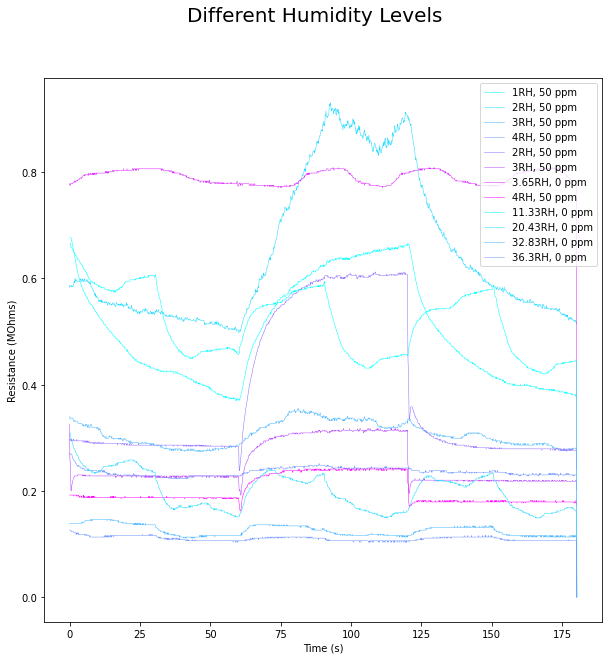

In [593]:
#Now its RH time

#print the length of all entries in RH_list

#Plot all RH data with labels for the humidity level

Combined_Plot_RH = plt.figure(figsize = (10,10))
Combined_Plot_RH.suptitle('Different Humidity Levels', fontsize = 20)

humidity_levels= [1,2,3,4,2,3,3.65,4,11.33,20.43,32.83,36.3]
acetone_levels = [50,50,50,50,50,50,0,50,0,0,0,0]

for i in range(len(RH_list)):
    plt.plot(RH_list[i]['Time'], RH_list[i]['Resistance'], label = str(humidity_levels[i])+ 'RH, ' + str(acetone_levels[i]) + ' ppm')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')







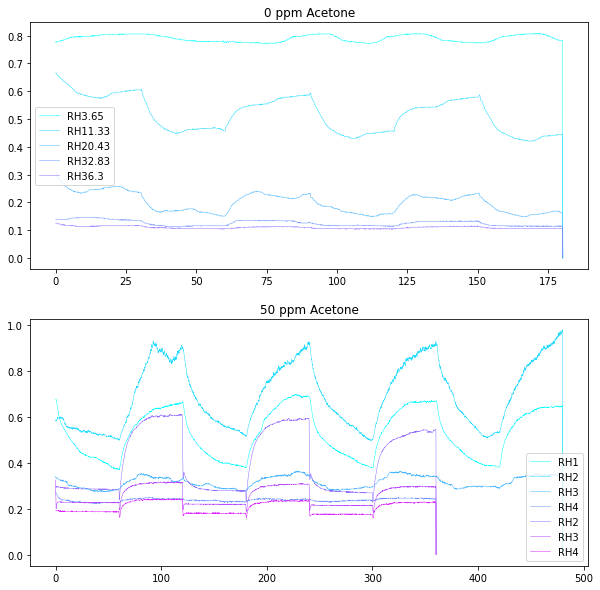

In [594]:
#Split this into two plots, one with 0 ppm and one with 50 ppm, make it two subplots
#0 ppm is RH8, RH10, RH11, RH12, and RH13

#50 ppm is RH1, RH2, RH3, RH4, RH6, RH7, RH9

#make two subplots

plt.subplot(2,1,1)
plt.plot(RH8['Time'], RH8['Resistance'], label = 'RH3.65')
plt.plot(RH10['Time'], RH10['Resistance'], label = 'RH11.33')
plt.plot(RH11['Time'], RH11['Resistance'], label = 'RH20.43')
plt.plot(RH12['Time'], RH12['Resistance'], label = 'RH32.83')
plt.plot(RH13['Time'], RH13['Resistance'], label = 'RH36.3')

plt.legend()
plt.title('0 ppm Acetone')

plt.subplot(2,1,2)
plt.plot(RH1['Time'], RH1['Resistance'], label = 'RH1')
plt.plot(RH2['Time'], RH2['Resistance'], label = 'RH2')
plt.plot(RH3['Time'], RH3['Resistance'], label = 'RH3')
plt.plot(RH4['Time'], RH4['Resistance'], label = 'RH4')
plt.plot(RH6['Time'], RH6['Resistance'], label = 'RH2')
plt.plot(RH7['Time'], RH7['Resistance'], label = 'RH3')
plt.plot(RH9['Time'], RH9['Resistance'], label = 'RH4')

plt.legend()
plt.title('50 ppm Acetone')

#make them bigger
plt.gcf().set_size_inches(10,10)







R^2, 0ppm: 0.9532318747240855
R^2, 50ppm: 0.7216046645934306


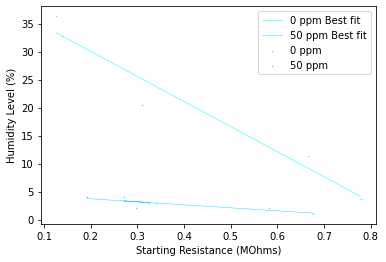

In [595]:
# It is clear that more humidity leads to a lower resistance

#lets see how humidity level and starting resitance scale

#Id like to take the first resistance value from every graph

zero_starting_resistances = [RH8['Resistance'][0], RH10['Resistance'][0], RH11['Resistance'][0], RH12['Resistance'][0], RH13['Resistance'][0]]
fifty_starting_resistances = [RH1['Resistance'][0], RH2['Resistance'][0], RH3['Resistance'][0], RH4['Resistance'][0], RH6['Resistance'][0], RH7['Resistance'][0], RH9['Resistance'][0]]

zero_humidity_levels= [3.65, 11.33, 20.43, 32.83, 36.3]
fifty_humidity_levels = [1,2,3,4,2,3,4]

plt.scatter(zero_starting_resistances, zero_humidity_levels, label = '0 ppm')
plt.scatter(fifty_starting_resistances, fifty_humidity_levels, label = '50 ppm')



plt.xlabel('Starting Resistance (MOhms)')
plt.ylabel('Humidity Level (%)')

#Best fit lines

#0 ppm
m_zero, b_zero = np.polyfit(zero_starting_resistances, zero_humidity_levels, 1)
plt.plot(zero_starting_resistances, m_zero*np.array(zero_starting_resistances) + b_zero, label = '0 ppm Best fit')

#50 ppm
m_fifty, b_fifty = np.polyfit(fifty_starting_resistances, fifty_humidity_levels, 1)
plt.plot(fifty_starting_resistances, m_fifty*np.array(fifty_starting_resistances) + b_fifty, label = '50 ppm Best fit')

plt.legend()

#calculate R^2 values
#0 ppm
residuals_zero = np.array(zero_humidity_levels) - (m_zero*np.array(zero_starting_resistances) + b_zero)
ss_res_zero = np.sum(residuals_zero**2)
ss_tot_zero = np.sum((zero_humidity_levels - np.mean(zero_humidity_levels))**2)
r_squared_zero = 1 - (ss_res_zero / ss_tot_zero)
print("R^2, 0ppm: " + str(r_squared_zero))

#50 ppm
residuals_fifty = np.array(fifty_humidity_levels) - (m_fifty*np.array(fifty_starting_resistances) + b_fifty)
ss_res_fifty = np.sum(residuals_fifty**2)
ss_tot_fifty = np.sum((fifty_humidity_levels - np.mean(fifty_humidity_levels))**2)
r_squared_fifty = 1 - (ss_res_fifty / ss_tot_fifty)
print("R^2, 50ppm: " + str(r_squared_fifty))



    



In [596]:
#big machine learning time, I want it to guess the ppm

#I can use all 1803 points for each graph, and use the resistance, time, RH, and temp as the input and the ppm as the output

#I will use a randomly chosen 80/20 split for training and testing

#X will be the Time, Resistance, Binary, Temp, and RH


#INDIVDIUAL POINT PROCESSING

X = mega_df[['Time', 'Resistance', 'Binary', 'Temp', 'RH']]
y = mega_df['ppm']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#train the model
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50), max_iter=10,verbose=True,alpha=.1)
mlp.fit(X_train, y_train)

#make predictions
predictions = mlp.predict(X_test)

#evaluate the model


print("Mean Absolute Error: " + str(mean_absolute_error(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(y_test, predictions)))
print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(y_test, predictions))))
print("R^2: " + str(r2_score(y_test, predictions)))

#I want to plot the residuals

residuals = y_test - predictions

avg_residual = np.mean(residuals)

# plt.scatter(X_test['Time'], residuals, label = 'Residuals')
# plt.xlabel('Actual ppm')
# plt.ylabel('Residuals')

# plt.plot(X_test['Time'], y_test, label = 'Actual')

# plt.show()


#I want to make a table which compares actual ppm values to the predicted
#The table will then be printed out

compare_table = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(compare_table)
print("AVG RESIDUAL: "+ str(avg_residual))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



















Iteration 1, loss = 175.68369932
Iteration 2, loss = 69.39058338
Iteration 3, loss = 58.74686863
Iteration 4, loss = 55.01583641
Iteration 5, loss = 52.66650307
Iteration 6, loss = 50.89664709
Iteration 7, loss = 49.69403628
Iteration 8, loss = 48.79699321
Iteration 9, loss = 47.87851321
Iteration 10, loss = 46.87373613
Mean Absolute Error: 5.843432144585039
Mean Squared Error: 92.52600424382037
Root Mean Squared Error: 9.619043832097885
R^2: 0.7942308137901898


/Users/jonahsachs/opt/anaconda3/envs/cse217a_2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


        Actual  Predicted
18880       17   9.300666
90531        0   3.167161
169671      50  34.773176
98150       17   7.911707
80424       50  50.912063
112294      50  50.067246
53018       50  45.786863
173733       0  31.207248
58602       50  51.376335
161113      50  32.269930
199707      50  47.922031
8830         0   8.597086
126652      50  50.942860
14760       17  17.565699
153452      29  37.043098
60616        0   4.106206
46550       17  14.106225
66987        0   2.266458
44904       17  17.238879
16005       17   8.219609
112317      50  52.359793
35962       50  46.450089
53885       50  47.192678
62331        0  19.923129
1693        50  50.444592
179894      14  17.777185
145782       0  -1.029986
110647      50  51.091633
37490        0   7.659791
124776      50  50.922340
27024       50  51.526476
156611      36  42.091170
122193      50  51.199377
36371        0  22.791803
186594      28  39.394269
173164       0  19.132057
40105        0   1.476249
170998      

In [597]:
#Instead of randomly feeding points in, I want to feed all the points of a time series in

#lets use RH5, which should predict 0 ppm (or close to it)

X_RH5 = RH5[['Time', 'Resistance', 'Binary', 'Temp', 'RH']]
y_RH5 = RH5['ppm']


#scale the data
scaler = StandardScaler()
scaler.fit(X_RH5)
X_RH5 = scaler.transform(X_RH5)


RH5_predictions = mlp.predict(X_RH5)

RH5_residuals = y_RH5 - RH5_predictions

RH5_avg_residual = np.mean(RH5_residuals)

print(RH5_avg_residual)



10.378776375245959


In [598]:
NN_Structure = ["(10,10,10)","(10,10,10,10)","(20,20,20)","(50,50,50)","(20,20,20,20)","(50,50,50,50):1st","(50,50,50,50):2nd","(30,30,30,30)"]
NN_R2s = [.78205,.77470,.82492,.8788,.86004,.8734,.8879,.8504]
NN_Iterations = [315,240,300,300,225,84,102,112]
NN_Est_Times_Min = [3,5,8,16,14,6.5,7,5]
NN_Final_Loss = [50.32,50.56,39.65,27.57,31.81,27.445,25.43,30.71]

#Plot these in a table

NN_Table = pd.DataFrame({'Structure': NN_Structure, 'R^2': NN_R2s, 'Iterations': NN_Iterations, 'Est Time (min)': NN_Est_Times_Min, 'Final Loss': NN_Final_Loss})

print(NN_Table)


           Structure      R^2  Iterations  Est Time (min)  Final Loss
0         (10,10,10)  0.78205         315             3.0      50.320
1      (10,10,10,10)  0.77470         240             5.0      50.560
2         (20,20,20)  0.82492         300             8.0      39.650
3         (50,50,50)  0.87880         300            16.0      27.570
4      (20,20,20,20)  0.86004         225            14.0      31.810
5  (50,50,50,50):1st  0.87340          84             6.5      27.445
6  (50,50,50,50):2nd  0.88790         102             7.0      25.430
7      (30,30,30,30)  0.85040         112             5.0      30.710


In [599]:
#Alpha comparisons for overfitting avoidance
#Iterations locked at 100
#Structure is (10,10,10)

NN2_Alpha = [.0001,.001,.01,.1,.5,1,1,1]
NN2_R2s = [.7417,.7461,.7284,.7248,.7533,.7076,.7479,.7163]
NN2_Iterations = [100,100,100,100,100,100,100,100]
NN2_Final_Loss = [58.52,55.85,60.38,60.91,56.08,65.81,58.72,65.1]

#Plot these in a table

NN2_Table = pd.DataFrame({'Alpha': NN2_Alpha, 'R^2': NN2_R2s, 'Iterations': NN2_Iterations, 'Final Loss': NN2_Final_Loss})

print(NN2_Table)

    Alpha     R^2  Iterations  Final Loss
0  0.0001  0.7417         100       58.52
1  0.0010  0.7461         100       55.85
2  0.0100  0.7284         100       60.38
3  0.1000  0.7248         100       60.91
4  0.5000  0.7533         100       56.08
5  1.0000  0.7076         100       65.81
6  1.0000  0.7479         100       58.72
7  1.0000  0.7163         100       65.10


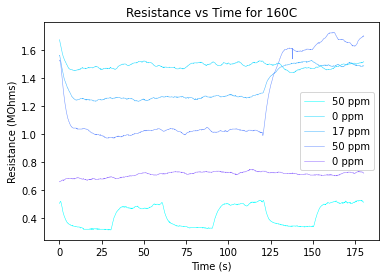

In [600]:
#temp data visualization



Vis_Temp_list = Temp_list



ppm_temp_list = [50,50,50,0,17,50,0,50,0,17,50,50,0,17,50,50,0,17,50]
temp_temp_list = [140,150,160,160,160,160,160,180,180,180,180,210,210,210,210,225,225,225,225]

#I want to plot out all 160C data points, there are 5 graphs which are stored in the [2,6] slots of Vis_Temp_list
#I want to plot them all on the same graph with x as Time, y as Resistance, and the label as the ppm

for i in range(2,7):
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(ppm_temp_list[i]) + ' ppm')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Resistance vs Time for 160C')
plt.legend()

plt.show()

#possible spike at 125 



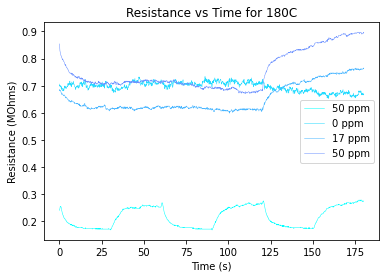

In [601]:
#I want to plot the 180C graphs and compare ppm, they are stored in the [7,10] slots and there are 4 of them

for i in range(7,11):
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(ppm_temp_list[i]) + ' ppm')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Resistance vs Time for 180C')
plt.legend()

plt.show()



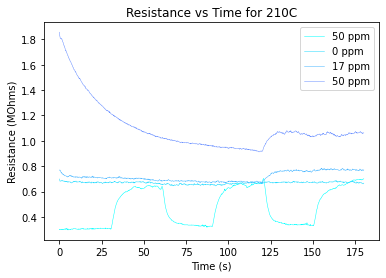

In [602]:
#Now 210C which is stored in [11,14], there are 4 of them

for i in range(11,15):
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(ppm_temp_list[i]) + ' ppm')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Resistance vs Time for 210C')
plt.legend()

plt.show()

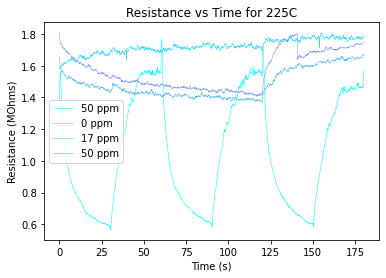

In [603]:
#Finally 225C which is stored in [15,18], there are 4 of them

for i in range(15,19):
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(ppm_temp_list[i]) + ' ppm')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Resistance vs Time for 225C')
plt.legend()

plt.show()

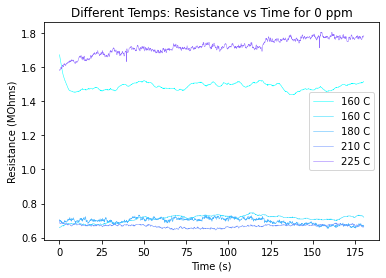

In [604]:
#this suggests a spike at about 125 which is ~the 1250th data point



#I now want to compare all of the samples which have 0 ppm acetone. This is 3,6,8,12,16. Plot them on the same graph

for i in [3,6,8,12,16]:
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(temp_temp_list[i]) + ' C')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Different Temps: Resistance vs Time for 0 ppm')
plt.legend()

plt.show()


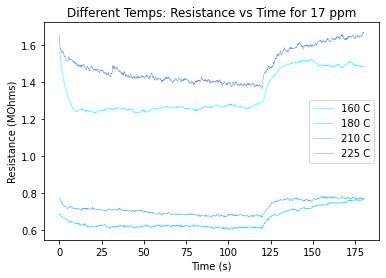

In [605]:
#I now want to compare all of the samples which have 17 ppm acetone. They are in 4,9,13,17. Plot them on the same graph

for i in [4,9,13,17]:
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(temp_temp_list[i]) + ' C')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Different Temps: Resistance vs Time for 17 ppm')
plt.legend()

plt.show()

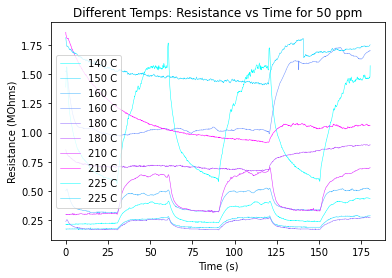

In [606]:
#I now want to compare all of the samples which have 50 ppm acetone. They are in 0,1,2,5,7,10,11,14,15,18. Plot them on the same graph

for i in [0,1,2,5,7,10,11,14,15,18]:
    plt.plot(Vis_Temp_list[i]['Time'], Vis_Temp_list[i]['Resistance'], label = str(temp_temp_list[i]) + ' C')

plt.xlabel('Time (s)')
plt.ylabel('Resistance (MOhms)')
plt.title('Different Temps: Resistance vs Time for 50 ppm')
plt.legend()

plt.show()



In [607]:
#I want to have a collection of all 1803 raw data points for each list (resistance). no other variables
#this will be a list of arrays, each 1D of size 1803
#This will serve as my input for ML
#The output will be ppm labels

Input_list = []

for i in range(0,19):
    Input_list.append(Vis_Temp_list[i]['Resistance'])

#add RH values now
for i in range(19,31):
    Input_list.append(RH_list[i-19]['Resistance'])

#var_ppm_list now with 8 entries

for i in range(31,39):
    Input_list.append(var_ppm_list[i-31]['Resistance'])

#now top ppm list with 8 entries

for i in range(39,47):
    Input_list.append(top_ppm_list[i-39]['Resistance'])

#now Sixty S list with 2 entries

for i in range(47,49):
    Input_list.append(sixtyS_list[i-47]['Resistance'])



Output_list = []

RH_ppm = [50,50,50,50,50,50,0,50,0,0,0,0]
var_ppm_ppm = [0,7,14,21,29,36,43,50]
top_ppm_ppm =[0,7,14,21,28,35,42,50]

#now I want to make the output list, which is the ppm values

for i in range(0,19):
    Output_list.append(ppm_temp_list[i])

#add RH values now
for i in range(19,31):
    Output_list.append(RH_ppm[i-19])


#add var ppm values now

for i in range(31,39):
    Output_list.append(var_ppm_ppm[i-31])

#add top ppm values now

for i in range(39,47):
    Output_list.append(top_ppm_ppm[i-39])

#add sixty S values now

for i in range(47,49):
    Output_list.append(50)





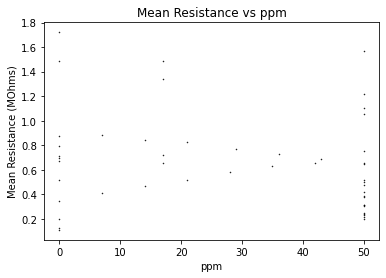

In [608]:
# print(Input_list[0])


#box for mean average values for all graphs

Mean_Values_list = []

#add all plot titles

plot_titles = []

for i in range(0,19):
    plot_titles.append(str(ppm_temp_list[i]) + ' ppm:Vis_Temp_list')

for i in range(0,12):
    plot_titles.append(str(RH_ppm[i]) + ' ppm:RH_list')

#var_ppm first

for i in range(0,8):
    plot_titles.append(str(var_ppm_ppm[i]) + ' ppm:var_ppm_list')

#now top_ppm

for i in range(0,8):
    plot_titles.append(str(top_ppm_ppm[i]) + ' ppm:top_ppm_list')




#now sixty S

for i in range(0,2):
    plot_titles.append(str(50) + ' ppm:sixtyS_list')

#now I want to make the mean values list

for i in range(0,49):
    Mean_Values_list.append(np.mean(Input_list[i]))

#now I want to make the standard deviation list

Std_Values_list = []

for i in range(0,49):
    Std_Values_list.append(np.std(Input_list[i]))

#plot Output_list vs Mean_values_list

plt.plot(Output_list, Mean_Values_list, 'o',color='black')

plt.xlabel('ppm')
plt.ylabel('Mean Resistance (MOhms)')
plt.title('Mean Resistance vs ppm')


plt.show()










In [609]:
#graph the 31-38 points of ppm and Mean resistance

plt.plot


In [610]:
input_array = np.array(Input_list)
output_array = np.array(Output_list)

print(input_array.shape)
print(output_array.shape)

(49,)
(49,)


/Users/jonahsachs/opt/anaconda3/envs/cse217a_2/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [611]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

RF_regr = RandomForestRegressor(max_depth=10, random_state=69)

#split this into training and testing data

X_train, X_test, y_train, y_test = train_test_split(input_array, output_array, test_size=0.2, random_state=69)

#Train the model

RF_regr.fit(X_train, y_train)

#predict the values

y_pred = RF_regr.predict(X_test)

#calculate the residuals

residuals = y_test - y_pred

#plot the residuals vs the actual ppm

plt.scatter(y_test, residuals)
plt.xlabel('Actual ppm')
plt.ylabel('Residuals')
plt.title("RF Regression")

plt.show()

#error metrics

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("MSE: "+ str(mse))

#R^2 value

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R^2: " + str(r2))



ValueError: setting an array element with a sequence.

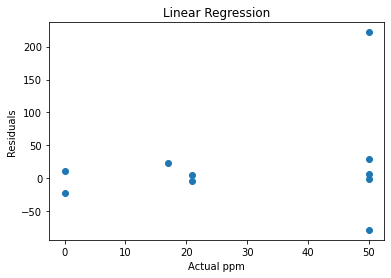

MSE: 5758.006440209885
R^2: -12.965913410972577


In [ ]:
#now linear regression

from sklearn.linear_model import LinearRegression

LR_regr = LinearRegression()

#Train the model

LR_regr.fit(X_train, y_train)

#predict the values

y_pred = LR_regr.predict(X_test)

#calculate the residuals

residuals = y_test - y_pred

#plot the residuals vs the actual ppm

plt.scatter(y_test, residuals)
plt.xlabel('Actual ppm')
plt.ylabel('Residuals')
plt.title("Linear Regression")


plt.show()

#error metrics

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("MSE: "+ str(mse))

#R^2 value

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R^2: "+ str(r2))


Iteration 1, loss = 619.62556568
Iteration 2, loss = 619.44509410
Iteration 3, loss = 620.01442177
Iteration 4, loss = 617.98111500
Iteration 5, loss = 616.13848609
Iteration 6, loss = 615.52817748
Iteration 7, loss = 615.29320311
Iteration 8, loss = 615.10010125
Iteration 9, loss = 614.89849371
Iteration 10, loss = 614.69074913
Iteration 11, loss = 614.49178777
Iteration 12, loss = 614.29330924
Iteration 13, loss = 614.08797465
Iteration 14, loss = 613.87741869
Iteration 15, loss = 613.67561421
Iteration 16, loss = 613.47497891
Iteration 17, loss = 613.28189734
Iteration 18, loss = 613.08566956
Iteration 19, loss = 612.88589522
Iteration 20, loss = 612.68314788
Iteration 21, loss = 612.47789011
Iteration 22, loss = 612.27317218
Iteration 23, loss = 612.07011408
Iteration 24, loss = 611.86452594
Iteration 25, loss = 611.65989623
Iteration 26, loss = 611.45272163
Iteration 27, loss = 611.24372995
Iteration 28, loss = 611.03642168
Iteration 29, loss = 610.82704149
Iteration 30, loss = 61

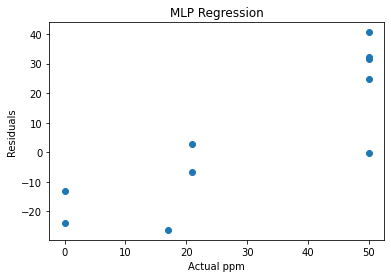

MSE: 575.4026389989206
R^2: -0.395625988985715
Average Residual: 6.158932086148349


In [ ]:
#now MLP regression

from sklearn.neural_network import MLPRegressor

MLP_regr = MLPRegressor(random_state=69, max_iter=1000, hidden_layer_sizes=(10,10,10,10),alpha=0.1,verbose=True,solver= 'adam',activation='relu')

#Train the model

MLP_regr.fit(X_train, y_train)

#predict the values

y_pred = MLP_regr.predict(X_test)

#calculate the residuals

residuals = y_test - y_pred

#plot the residuals vs the actual ppm

plt.scatter(y_test, residuals)
plt.xlabel('Actual ppm')
plt.ylabel('Residuals')
plt.title("MLP Regression")


plt.show()

#error metrics

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("MSE: "+ str(mse))

#R^2 value

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R^2: "+ str(r2))

#print out the average residual for this model

print("Average Residual: " + str(np.mean(residuals)))

#I want to print out the equation of the line that the MLP regression is fitting to the data

# print("MLP Regression Equation: y = " + str(MLP_regr.intercepts_[3]) + " + " + str(MLP_regr.coefs_[3][0]) + "x1 + " + str(MLP_regr.coefs_[3][1]) + "x2 + " + str(MLP_regr.coefs_[3][2]) + "x3 + " + str(MLP_regr.coefs_[3][3]) + "x4")

#can you give me the complexity of the equation that the MLP regression is fitting to the data?


#thats the iteration that the MLP regression stopped at, I want the complexity of the equation that it is fitting to the data












In [ ]:
#table with MLP results

NN3_hidden_layers = ["(100,100,100)","(100,100,100,100)","(100,100,100,100)","(100,100,100,100)","(100,100,100,100)","(100,100,100,100)","(100,100,100,100)","(100,100,100,100)","(100,100,100,100)"]
NN3_iterations = [383,387,250,387,28,170,938,939,387]
NN3_R2s = [.26,.507,.005563,.5067,-.0159,.135,-.016,-.03,.5067]
NN3_solvers = ["default","default","lbfgs","adam","sgd","adam","adam","adam","adam"]
NN3_activations = ["default","default","default","default","default","Identity","logistic","tanh","relu"]

#maybe a table combining these

NN3_table = pd.DataFrame(list(zip(NN3_hidden_layers,NN3_iterations,NN3_R2s,NN3_solvers,NN3_activations)),columns = ['Hidden Layers','Iterations','R^2','Solver','Activation'])

print(NN3_table)




       Hidden Layers  Iterations       R^2   Solver Activation
0      (100,100,100)         383  0.260000  default    default
1  (100,100,100,100)         387  0.507000  default    default
2  (100,100,100,100)         250  0.005563    lbfgs    default
3  (100,100,100,100)         387  0.506700     adam    default
4  (100,100,100,100)          28 -0.015900      sgd    default
5  (100,100,100,100)         170  0.135000     adam   Identity
6  (100,100,100,100)         938 -0.016000     adam   logistic
7  (100,100,100,100)         939 -0.030000     adam       tanh
8  (100,100,100,100)         387  0.506700     adam       relu


In [ ]:
#I want to do the same thing I did above, but now introduce the other variables to do a multidimensional regression

#lets start with Temp List. ppm is the output, and the other variables are the input

#drop the ppm from all Temp varaibles

#fstring the i to access Temp1 through Temp19

Temp1 = Temp1.drop(columns=['ppm'])
Temp2 = Temp2.drop(columns=['ppm'])
Temp3 = Temp3.drop(columns=['ppm'])
Temp4 = Temp4.drop(columns=['ppm'])
Temp5 = Temp5.drop(columns=['ppm'])
Temp6 = Temp6.drop(columns=['ppm'])
Temp7 = Temp7.drop(columns=['ppm'])
Temp8 = Temp8.drop(columns=['ppm'])
Temp9 = Temp9.drop(columns=['ppm'])
Temp10 = Temp10.drop(columns=['ppm'])
Temp11 = Temp11.drop(columns=['ppm'])
Temp12 = Temp12.drop(columns=['ppm'])
Temp13 = Temp13.drop(columns=['ppm'])
Temp14 = Temp14.drop(columns=['ppm'])
Temp15 = Temp15.drop(columns=['ppm'])
Temp16 = Temp16.drop(columns=['ppm'])
Temp17 = Temp17.drop(columns=['ppm'])
Temp18 = Temp18.drop(columns=['ppm'])
Temp19 = Temp19.drop(columns=['ppm'])

#now drop all the RH ones

RH1 = RH1.drop(columns=['ppm'])
RH2 = RH2.drop(columns=['ppm'])
RH3 = RH3.drop(columns=['ppm'])
RH4 = RH4.drop(columns=['ppm'])
# RH5 = RH5.drop(columns=['ppm'])
RH6 = RH6.drop(columns=['ppm'])
RH7 = RH7.drop(columns=['ppm'])
RH8 = RH8.drop(columns=['ppm'])
RH9 = RH9.drop(columns=['ppm'])
RH10 = RH10.drop(columns=['ppm'])
RH11 = RH11.drop(columns=['ppm'])
RH12 = RH12.drop(columns=['ppm'])
RH13 = RH13.drop(columns=['ppm'])

#now var_ppm

var_ppm1 = zeroppmA.drop(columns=['ppm'])
var_ppm2 = sevenppmA.drop(columns=['ppm'])
var_ppm3 = fourteenppmA.drop(columns=['ppm'])
var_ppm4 = twentyoneppmA.drop(columns=['ppm'])
var_ppm5 = twentynineppmA.drop(columns=['ppm'])
var_ppm6 = thirtysixppmA.drop(columns=['ppm'])
var_ppm7 = fourtythreeppmA.drop(columns=['ppm'])
var_ppm8 = fiftyppmA.drop(columns=['ppm'])

#now top_var_ppm

top_var_ppm1 = top_zeroppmA.drop(columns=['ppm'])
top_var_ppm2 = top_sevenppmA.drop(columns=['ppm'])
top_var_ppm3 = top_fourteenppmA.drop(columns=['ppm'])
top_var_ppm4 = top_twentyoneppmA.drop(columns=['ppm'])
top_var_ppm5 = top_twentyeightppmA.drop(columns=['ppm'])
top_var_ppm6 = top_thirtyfiveppmA.drop(columns=['ppm'])
top_var_ppm7 = top_fourtytwoppmA.drop(columns=['ppm'])
top_var_ppm8 = top_fiftyppmA.drop(columns=['ppm'])

#add Sixty S

SixtyS1 = sixtyS_sensor1.drop(columns=['ppm'])
SixtyS2 = sixtyS_sensor2.drop(columns=['ppm'])


#add all of these together into a list

BIG_Input_list = []

BIG_Input_list.append(Temp1)
BIG_Input_list.append(Temp2)
BIG_Input_list.append(Temp3)
BIG_Input_list.append(Temp4)
BIG_Input_list.append(Temp5)
BIG_Input_list.append(Temp6)
BIG_Input_list.append(Temp7)
BIG_Input_list.append(Temp8)
BIG_Input_list.append(Temp9)
BIG_Input_list.append(Temp10)
BIG_Input_list.append(Temp11)
BIG_Input_list.append(Temp12)
BIG_Input_list.append(Temp13)
BIG_Input_list.append(Temp14)
BIG_Input_list.append(Temp15)
BIG_Input_list.append(Temp16)
BIG_Input_list.append(Temp17)
BIG_Input_list.append(Temp18)
BIG_Input_list.append(Temp19)

BIG_Input_list.append(RH1)
BIG_Input_list.append(RH2)
BIG_Input_list.append(RH3)
BIG_Input_list.append(RH4)
# BIG_Input_list.append(RH5)
BIG_Input_list.append(RH6)
BIG_Input_list.append(RH7)
BIG_Input_list.append(RH8)
BIG_Input_list.append(RH9)
BIG_Input_list.append(RH10)
BIG_Input_list.append(RH11)
BIG_Input_list.append(RH12)
BIG_Input_list.append(RH13)

BIG_Input_list.append(var_ppm1)
BIG_Input_list.append(var_ppm2)
BIG_Input_list.append(var_ppm3)
BIG_Input_list.append(var_ppm4)
BIG_Input_list.append(var_ppm5)
BIG_Input_list.append(var_ppm6)
BIG_Input_list.append(var_ppm7)
BIG_Input_list.append(var_ppm8)

BIG_Input_list.append(top_var_ppm1)
BIG_Input_list.append(top_var_ppm2)
BIG_Input_list.append(top_var_ppm3)
BIG_Input_list.append(top_var_ppm4)
BIG_Input_list.append(top_var_ppm5)
BIG_Input_list.append(top_var_ppm6)
BIG_Input_list.append(top_var_ppm7)
BIG_Input_list.append(top_var_ppm8)

BIG_Input_list.append(SixtyS1)
BIG_Input_list.append(SixtyS2)

In [ ]:
print(len(BIG_Input_list))


BIG_input_array = np.array(BIG_Input_list)





#make every array within BIG_input_array into the first 1803 rows

for i in range(len(BIG_input_array)):
    BIG_input_array[i] = BIG_input_array[i][:1803]

# for i in range(len(BIG_input_array)):
#     print(BIG_input_array[i].shape)


BIGGER_input_array = np.zeros((49,1803,5))

for i in range(len(BIG_input_array)):
    BIGGER_input_array[i] = BIG_input_array[i]

#convert BIGGER_input_array into a tensor for tensorflow

BIGGER_input_tensor = tf.convert_to_tensor(BIGGER_input_array)

output_tensor = tf.convert_to_tensor(output_array)



49


/Users/jonahsachs/opt/anaconda3/envs/cse217a_2/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
#tensorflow model

#Training test split

indices = np.arange(len(BIGGER_input_tensor))
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)

X_train = tf.gather(BIGGER_input_tensor, train_indices)
X_test = tf.gather(BIGGER_input_tensor, test_indices)
y_train = tf.gather(output_tensor, train_indices)
y_test = tf.gather(output_tensor, test_indices)



Train on 39 samples, validate on 10 samples
Epoch 1/50
39/39 [==============================] - 2s 42ms/sample - loss: 719.1855 - val_loss: 567.9073
Epoch 2/50
39/39 [==============================] - 0s 3ms/sample - loss: 593.2141 - val_loss: 526.5235
Epoch 3/50
39/39 [==============================] - 0s 3ms/sample - loss: 514.8266 - val_loss: 537.1160
Epoch 4/50
39/39 [==============================] - 0s 3ms/sample - loss: 518.1370 - val_loss: 560.6503
Epoch 5/50
39/39 [==============================] - 0s 3ms/sample - loss: 511.7123 - val_loss: 548.2123
Epoch 6/50
39/39 [==============================] - 0s 3ms/sample - loss: 503.3411 - val_loss: 544.1414
Epoch 7/50
39/39 [==============================] - 0s 3ms/sample - loss: 493.5510 - val_loss: 522.8787
Epoch 8/50
39/39 [==============================] - 0s 3ms/sample - loss: 485.1189 - val_loss: 513.9014
Epoch 9/50
39/39 [==============================] - 0s 3ms/sample - loss: 484.7854 - val_loss: 501.6560
Epoch 10/50
39/39 [

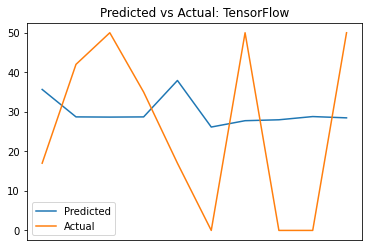

MAE:  20.71931266784668
MSE:  471.15701502019584
RMSE:  21.70615154789526
r2:  -0.10732805711108573


In [ ]:
import tensorflow_hub as hub

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1803, 5)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

#model summary

model.summary()

#compare the predictions to the actual values

y_pred = model.predict(X_test)

#y_pred is of size (10, 1803, 1)


#average the 1803 guesses for each of the 10 rows

y_pred_avg = np.zeros((10,1))

for i in range(len(y_pred)):
    y_pred_avg[i] = np.mean(y_pred[i])

print(y_pred_avg)

#compare these avgs to the actual values for ppm on a plot

plt.plot(y_pred_avg, label='Predicted')
plt.plot(y_test, label='Actual')

plt.legend()
plt.title('Predicted vs Actual: TensorFlow')

#get rid of xticks

plt.xticks([])

plt.show()



#accuracy measure

#mean absolute error

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred_avg)

print('MAE: ', MAE)

#mean squared error

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred_avg)

print('MSE: ', MSE)

#root mean squared error

RMSE = np.sqrt(MSE)

print('RMSE: ', RMSE)

#r2 score

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_avg)

print('r2: ', r2)












In [ ]:
#plot the residuals 

residuals = y_test - y_pred_avg

#make a list of all residuals with their original ppm value

print(residuals)







tf.Tensor(
[[-18   7  15   0 -18 -35  15 -35 -35  15]
 [-11  14  22   7 -11 -28  22 -28 -28  22]
 [-11  14  22   7 -11 -28  22 -28 -28  22]
 [-11  14  22   7 -11 -28  22 -28 -28  22]
 [-20   5  13  -2 -20 -37  13 -37 -37  13]
 [ -9  16  24   9  -9 -26  24 -26 -26  24]
 [-10  15  23   8 -10 -27  23 -27 -27  23]
 [-10  15  23   8 -10 -27  23 -27 -27  23]
 [-11  14  22   7 -11 -28  22 -28 -28  22]
 [-11  14  22   7 -11 -28  22 -28 -28  22]], shape=(10, 10), dtype=int64)


In [ ]:
#for all 49 entries in Big input list drop 'RH' 'Temp' and 'Binary'

# for i in range(len(BIG_Input_list)):
#     BIG_Input_list[i].drop(['RH', 'Temp', 'Binary'], axis=1, inplace=True)


#for each input of BIG_Input_list, drop time

# for i in range(len(BIG_Input_list)):
#     BIG_Input_list[i].drop(['Time'], axis=1, inplace=True)

#for every entry of BIG_Input_list, make each of the 1803 points into its own variable. I want the first resistance value to be stored in Res0, the second in Res1, etc.
#each variable will be a column with one variable

# for i in range(len(BIG_Input_list)):
#     for j in range(1803):
#         BIG_Input_list[i]['Res'+str(j)] = BIG_Input_list[i]['Resistance'][j]

#drop the resistance column

# for i in range(len(BIG_Input_list)):
#     BIG_Input_list[i].drop(['Resistance'], axis=1, inplace=True)

#drop all values other than the first in every column in every dataframe

# for i in range(len(BIG_Input_list)):
#     for j in range(1802):
#         BIG_Input_list[i].drop([j+1],inplace=True)

#that only dropped 1-1802, So have 1803-2402 or more left. Just keep the 0 row

#eliminate rows 1803-2402 for each
# ticker2 = 0
# for i in range(len(BIG_Input_list)):
#     print(ticker2)
#     ticker2 += 1
#     for j in range(1803,2403):
#         BIG_Input_list[i].drop([j],inplace=True)

#elimate the rows from 2403 to the end for each
#if it is already length 1, ignore it

# ticker3 = 0
# for i in range(len(BIG_Input_list)):
#     print(ticker3)
#     ticker3 += 1

#     if(len(BIG_Input_list[i]) != 1):
#         for j in range(4801, 7200):
#             BIG_Input_list[i].drop([j], inplace=True)






#print the length of each dataframe to make sure they are all just the 0 row

for i in range(len(BIG_Input_list)):
    print(len(BIG_Input_list[i]))

#make the length of each dataframe 1. Keep the entry in the zero row. If it is already 1, ignore it


#get rid of 4801-7200 for each

# ticker4 = 0
# for i in range(len(BIG_Input_list)):
#     print(ticker4)
#     ticker4 += 1
#     for j in range(4801,7201):
#         BIG_Input_list[i].drop([j],inplace=True)




#WHY IS THIS SO HARD. MAKE EVERY ONE LENGTH 1. TAKE THE FIRST ENTRY

new_BIG_Input_list = []

#add the first row of each dataframe to new_BIG_Input_list

for i in range(len(BIG_Input_list)):
    new_BIG_Input_list.append(BIG_Input_list[i].iloc[0])

# print(new_BIG_Input_list[1])










2403
2403
2403
7203
7203
7203
4803
2403
7203
7203
7203
2403
7203
7203
7203
2403
7203
7203
9603
4803
4803
4803
3603
3603
3603
1803
3603
1803
1803
1803
1803
1803
1803
1803
1803
1803
1803
1803
1803
4803
3603
3603
3603
3603
3603
3603
3603
4803
4803


In [ ]:
#machine learning time

#new_BIG_Input_list is a list of 49 dataframes. 1803 rows each, titled Res0 through Res1802. I want this to be my input for ML. My output will be a list of 49 ppm values, one for each entry in the list

#make a list of the ppm values, 49 of them

ppm_list = [0,7,14,21,29,36,43,50,50,50,0,7,14,21,28,35,42,50,50,50,50,50,50,50,0,50,0,0,0,0,50,50,50,0,17,50,0,50,0,17,50,50,0,17,50,50,0,17,50]

X_new = new_BIG_Input_list

y_new = ppm_list

#split into training and testing sets

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=112)


#scale the data

scaler = StandardScaler()

scaler.fit(X_train_new)

X_train_new = scaler.transform(X_train_new)

X_test_new = scaler.transform(X_test_new)

#make the model, lets use MLP regressor

mlp_new = MLPRegressor(hidden_layer_sizes=(50,50,50,50), max_iter=250,alpha=.001,verbose=True, random_state=114)

mlp_new.fit(X_train_new, y_train_new)

#make predictions

y_pred_new = mlp_new.predict(X_test_new)

#calculate R2 score

r2_new = r2_score(y_test_new, y_pred_new)

print('r2_new: ', r2_new)

#calculate the average residual

residuals_new = y_test_new - y_pred_new

print(str(np.mean(residuals_new)))





Iteration 1, loss = 563.41363516
Iteration 2, loss = 561.76442899
Iteration 3, loss = 560.09515704
Iteration 4, loss = 558.49447278
Iteration 5, loss = 556.89951627
Iteration 6, loss = 555.30843309
Iteration 7, loss = 553.70051054
Iteration 8, loss = 552.05736754
Iteration 9, loss = 550.37007269
Iteration 10, loss = 548.64802571
Iteration 11, loss = 546.85028861
Iteration 12, loss = 544.96514498
Iteration 13, loss = 542.96910673
Iteration 14, loss = 540.84692368
Iteration 15, loss = 538.61836238
Iteration 16, loss = 536.26456956
Iteration 17, loss = 533.78432917
Iteration 18, loss = 531.19770680
Iteration 19, loss = 528.49378881
Iteration 20, loss = 525.65843321
Iteration 21, loss = 522.68286804
Iteration 22, loss = 519.54278818
Iteration 23, loss = 516.21612982
Iteration 24, loss = 512.68148561
Iteration 25, loss = 508.95028568
Iteration 26, loss = 504.99592280
Iteration 27, loss = 500.79060231
Iteration 28, loss = 496.31956610
Iteration 29, loss = 491.52419874
Iteration 30, loss = 48

/Users/jonahsachs/opt/anaconda3/envs/cse217a_2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
